In [ ]:
                                 #   EDA assighnment part 1

In [ ]:
#.1)  What is the range of selling prices in the dataset



In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('BIKE DETAILS.csv')
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [15]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of Selling Prices:", price_range)

Range of Selling Prices: 755000


In [ ]:
# 2)  What is the median selling price for bikes in the dataset?

In [12]:
median_price = df['selling_price'].median()
print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [13]:
#3)  What is the most common seller type?
most_common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller)


Most Common Seller Type: Individual


In [ ]:
#:4)  How many bikes have driven more than 50,000 kilometers?

In [17]:
high_mileage_bikes = (df['km_driven'] > 50000).sum()
print("Number of bikes driven more than 50,000 km:", high_mileage_bikes)


Number of bikes driven more than 50,000 km: 170


In [ ]:
#5)  What is the average km_driven value for each ownership type?

In [18]:
# Calculate the average km_driven for each ownership type
avg_km_driven_per_owner = df.groupby("owner")["km_driven"].mean().round(2)
avg_km_driven_per_owner


owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64

In [ ]:
#6) What proportion of bikes are from the year 2015 or older?

In [19]:
# Count the total number of bikes
total_bikes = len(df)

# Count the number of bikes from 2015 or older
bikes_2015_or_older = len(df[df["year"] <= 2015])

# Calculate the proportion
proportion_2015_or_older = round((bikes_2015_or_older / total_bikes) * 100, 2)

# Print the result
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older}%")


Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#7) What is the trend of missing values across the dataset?

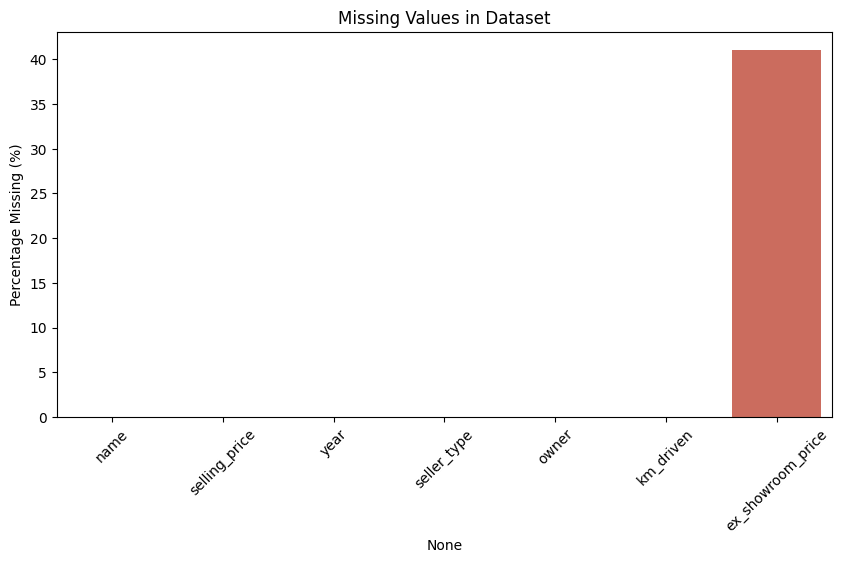

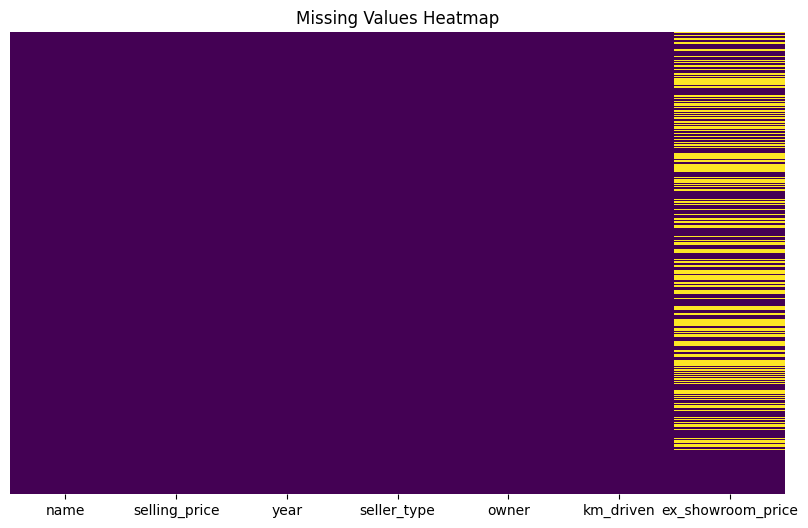

In [23]:

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Plot missing values as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_percentage, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Percentage Missing (%)")
plt.title("Missing Values in Dataset")
plt.show()

# Display missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
#8)  What is the highest ex_showroom_price recorded, and for which bike?

In [25]:
 
max_price_row = df.loc[df["ex_showroom_price"].idxmax(), ["name", "ex_showroom_price"]]

# Display the result
print(f"Bike with the highest ex-showroom price: {max_price_row['name']}")
print(f"Highest ex-showroom price: INR {max_price_row['ex_showroom_price']}")

Bike with the highest ex-showroom price: Harley-Davidson Street Bob
Highest ex-showroom price: INR 1278000.0


In [ ]:
#9)  What is the total number of bikes listed by each seller type?

In [26]:
# Count the number of bikes listed by each seller type
seller_type_counts = df['seller_type'].value_counts()

# Print the result
print(seller_type_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
#10) What is the relationship between selling_price and km_driven for first-owner bikes?

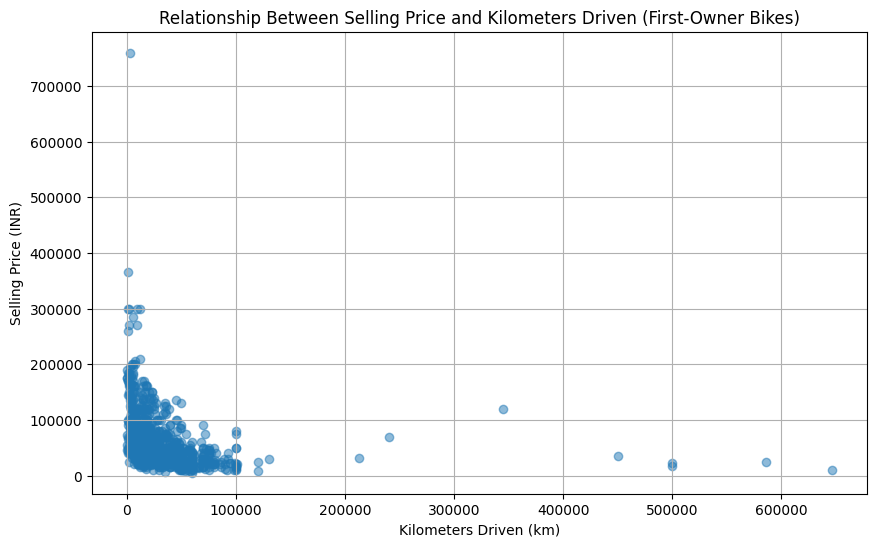

In [27]:
# Filter for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.5)
plt.title('Relationship Between Selling Price and Kilometers Driven (First-Owner Bikes)')
plt.xlabel('Kilometers Driven (km)')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

In [ ]:
#11)  Identify and remove outliers in the km_driven column using the IQR method?

In [28]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the DataFrame
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the shape before and after removing outliers to confirm
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")

Original dataset shape: (1061, 7)
Filtered dataset shape: (1022, 7)


In [ ]:
#12)  Perform a bivariate analysis to visualize the relationship between year and selling_price?

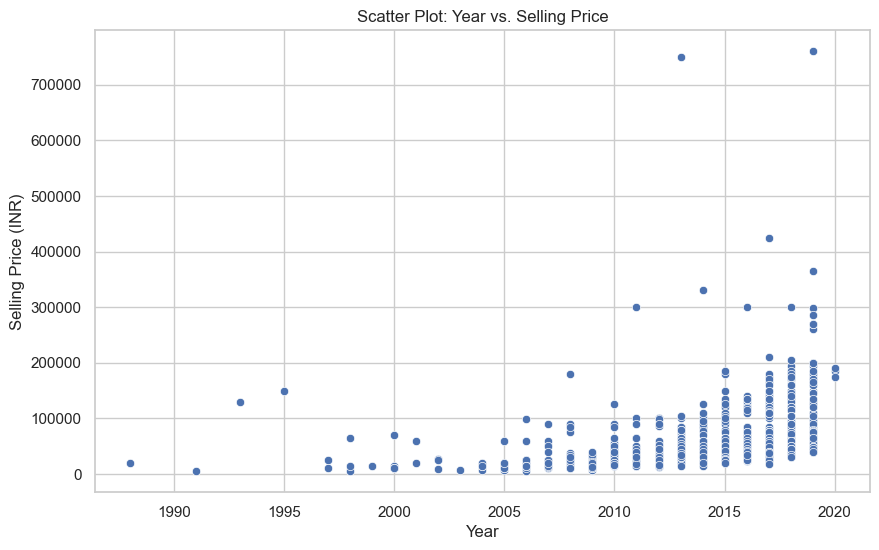

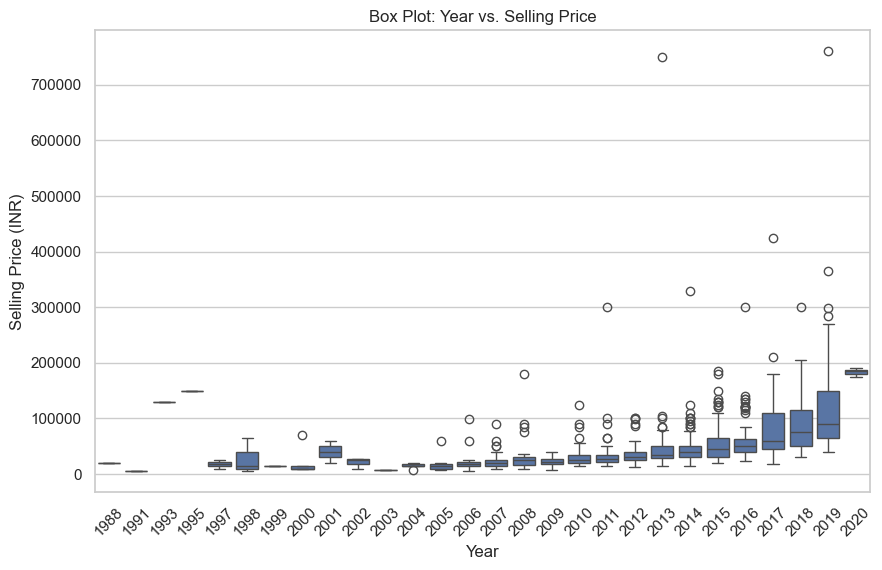

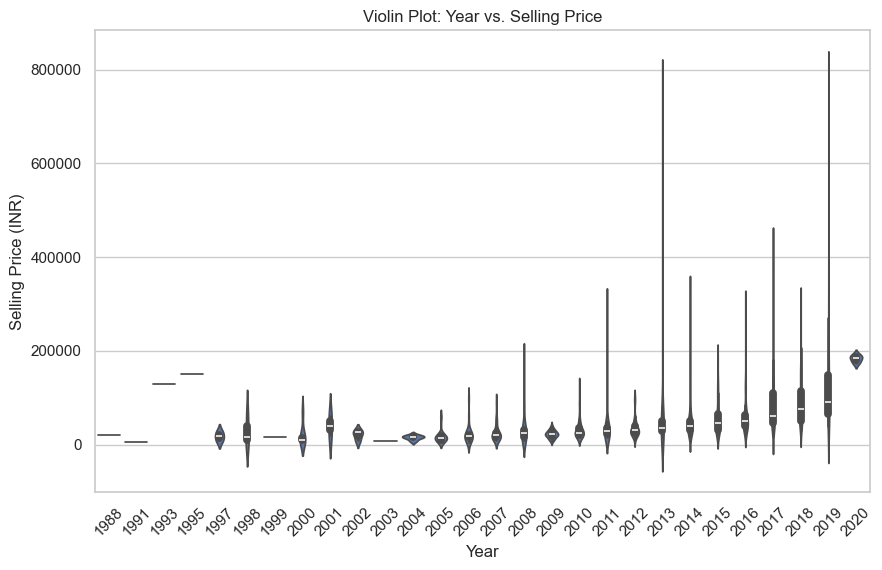

In [29]:
# Set the style for the plots
sns.set(style="whitegrid")

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Scatter Plot: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Box Plot: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.show()

# Violin Plot (optional, to view distribution and density)
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='selling_price', data=df)
plt.title('Violin Plot: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#13)  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [30]:
from datetime import datetime

# Step 1: Calculate the bike's age
current_year = datetime.now().year
df['bike_age'] = current_year - df['year']

# Step 2: Group by bike age and calculate the average selling price for each age group
avg_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()

# Step 3: Calculate depreciation rate per year (optional)
# Depreciation can be estimated by calculating the average difference in selling price as bike age increases
avg_price_by_age['depreciation'] = avg_price_by_age['selling_price'].diff()

# Display the results
print(avg_price_by_age)

    bike_age  selling_price   depreciation
0          5  183333.333333            NaN
1          6  119689.511628  -63643.821705
2          7   87660.374046  -32029.137582
3          8   78894.736842   -8765.637204
4          9   58469.018692  -20425.718151
5         10   56500.000000   -1969.018692
6         11   48668.131868   -7831.868132
7         12   51136.986301    2468.854433
8         13   35748.400000  -15388.586301
9         14   35655.721311     -92.678689
10        15   31793.333333   -3862.387978
11        16   22267.857143   -9525.476190
12        17   34289.285714   12021.428571
13        18   24927.586207   -9361.699507
14        19   23380.000000   -1547.586207
15        20   16978.571429   -6401.428571
16        21   15100.000000   -1878.571429
17        22    8000.000000   -7100.000000
18        23   20666.666667   12666.666667
19        24   40000.000000   19333.333333
20        25   20833.333333  -19166.666667
21        26   15000.000000   -5833.333333
22        2

In [ ]:
#14)  Which bike names are priced significantly above the average price for their manufacturing year?

In [31]:
# Step 1: Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.rename(columns={'selling_price': 'avg_price'}, inplace=True)

# Step 2: Merge the average price with the original dataset to compare each bike's price with the average
df = df.merge(avg_price_by_year, on='year', how='left')

# Step 3: Define a threshold for "significantly above average" (e.g., 1.5 times the average price)
threshold = 1.5  # You can adjust this multiplier based on your definition of "significant"
df['is_significantly_above'] = df['selling_price'] > (threshold * df['avg_price'])

# Step 4: Filter bikes that are priced significantly above the average for their year
bikes_above_avg = df[df['is_significantly_above']][['name', 'year', 'selling_price', 'avg_price']]

# Display the result
print(bikes_above_avg)

                                     name  year  selling_price      avg_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                          Yamaha YZF R3  2019         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
23                          Jawa Standard  2019         180000  119689.511628
..                                    ...   ...            ...            ...
979             Royal Enfield Thunder 500  2015         105000   56500.000000
981             Royal Enfield Thunder 350  2013         105000   51136.986301
983             Royal Enfield Classic 350  2015         100000   56500.000000
984             Royal Enfield Classic 500  2014          95000   48668.131868
985             Royal Enfield Classic 500  2011          90000   35655.721311

[157 rows x 4 columns]


In [ ]:
#15)  Develop a correlation matrix for numeric columns and visualize it using a heatmap?

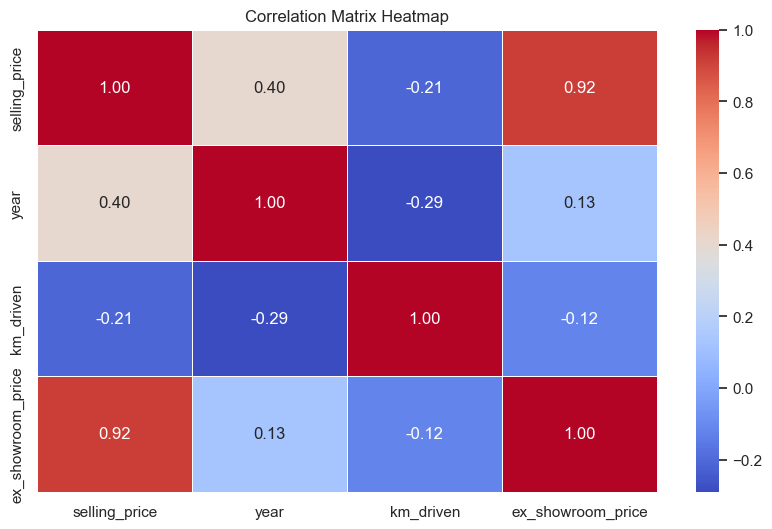

In [32]:
# Step 1: Select numeric columns
numeric_columns = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']]

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
                                  # EDA 2 assighnment

In [61]:
df=pd.read_csv("Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [37]:
df.shape

(23906, 16)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
#1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?

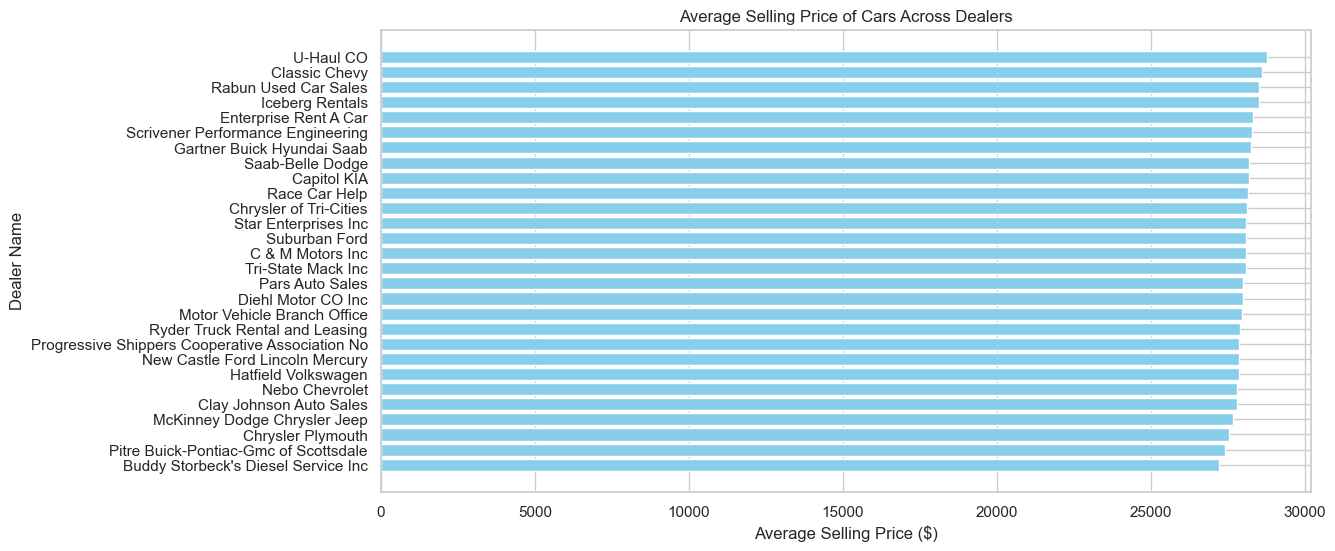

In [39]:
# Step 1: Group by Dealer_Name and calculate the average selling price
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Step 2: Sort dealers by average selling price
dealer_avg_price = dealer_avg_price.sort_values(by='Price ($)', ascending=False)

# Step 3: Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
plt.barh(dealer_avg_price['Dealer_Name'], dealer_avg_price['Price ($)'], color='skyblue')
plt.xlabel('Average Selling Price ($)')
plt.ylabel('Dealer Name')
plt.title('Average Selling Price of Cars Across Dealers')
plt.gca().invert_yaxis()  # Invert y-axis to show highest price at the top
plt.show()


In [ ]:
#2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

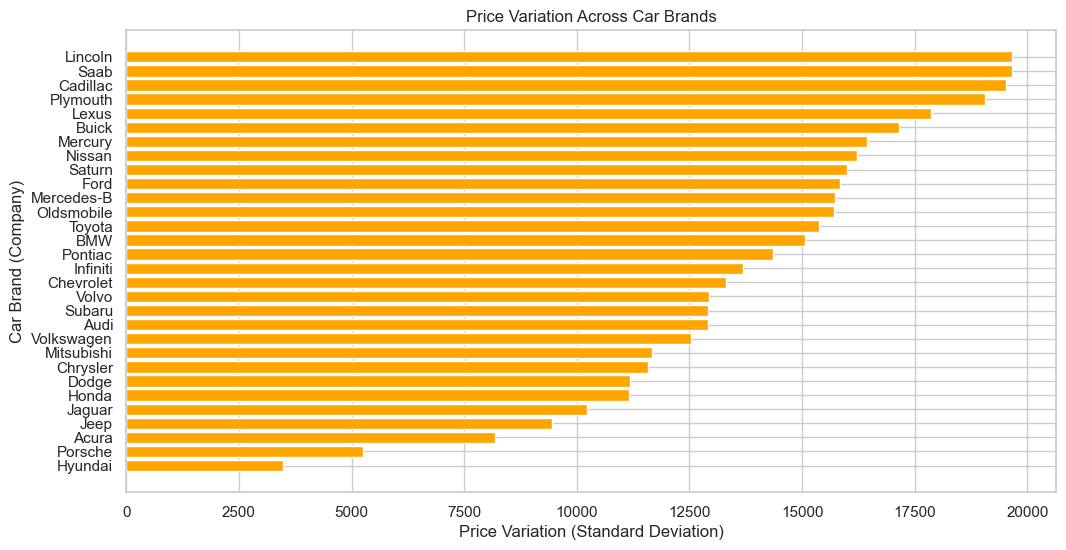

Brand with the highest price variation: Lincoln (19658.05)


In [40]:
# Step 1: Group by Company and calculate the standard deviation of Price
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()

# Step 2: Sort companies by price variation (descending order)
price_variation = price_variation.sort_values(by='Price ($)', ascending=False)

# Step 3: Identify the brand with the highest variation
highest_variation_brand = price_variation.iloc[0]  # Brand with max variation

# Step 4: Visualize the price variation using a bar plot
plt.figure(figsize=(12, 6))
plt.barh(price_variation['Company'], price_variation['Price ($)'], color='orange')
plt.xlabel('Price Variation (Standard Deviation)')
plt.ylabel('Car Brand (Company)')
plt.title('Price Variation Across Car Brands')
plt.gca().invert_yaxis()  # Show highest variation at the top
plt.show()

# Step 5: Print the brand with the highest variation
print(f"Brand with the highest price variation: {highest_variation_brand['Company']} ({highest_variation_brand['Price ($)']:.2f})")


In [ ]:
#3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

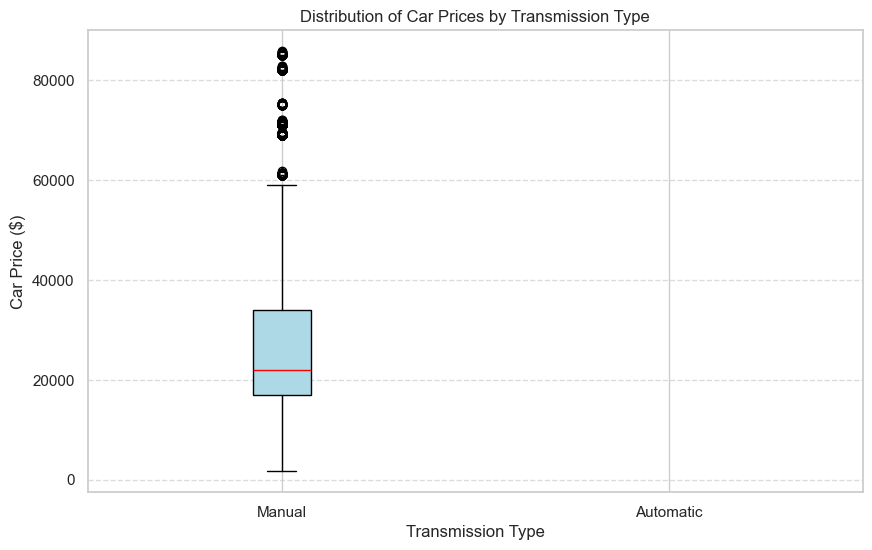

In [41]:
# Step 1: Create a boxplot for Price distribution by Transmission type
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Transmission'] == 'Manual']['Price ($)'], 
             df[df['Transmission'] == 'Automatic']['Price ($)']], 
            labels=['Manual', 'Automatic'], patch_artist=True, 
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Step 2: Customize the plot
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#4) What is the distribution of car prices across different regions?


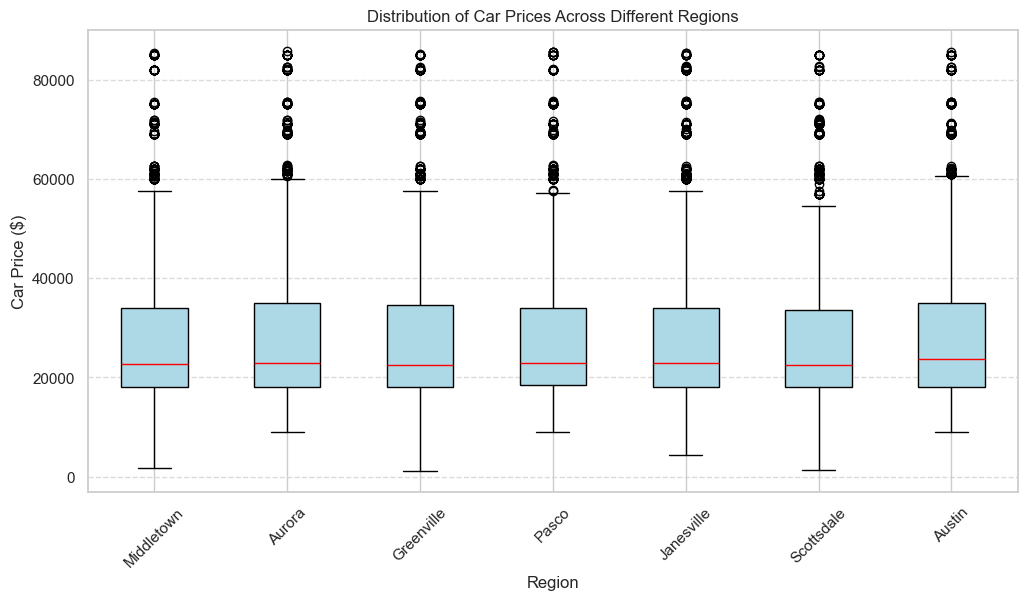

In [42]:
# Step 1: Create a boxplot for car price distribution by region
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Dealer_Region'] == region]['Price ($)'] for region in df['Dealer_Region'].unique()],
            labels=df['Dealer_Region'].unique(), patch_artist=True, 
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Step 2: Customize the plot
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#5) What is the distribution of cars based on body styles?

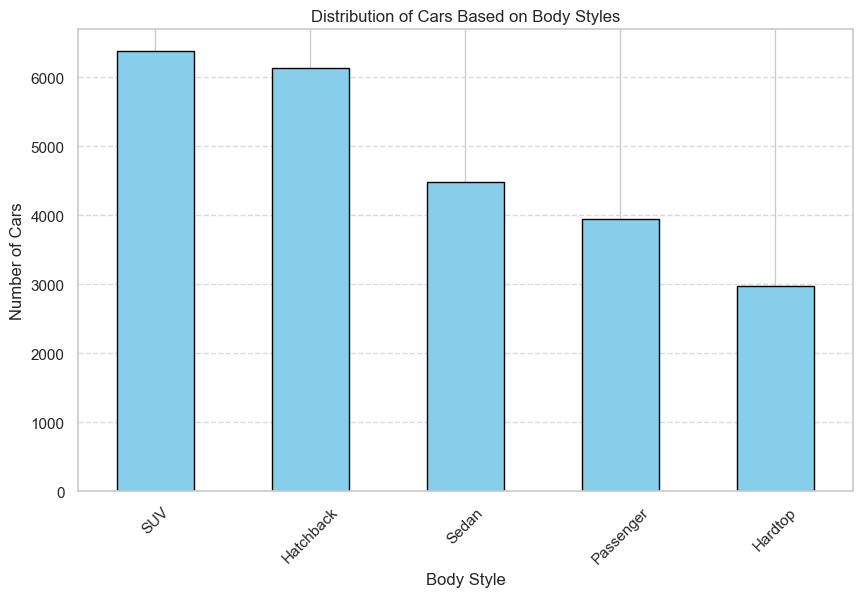

In [43]:
import matplotlib.pyplot as plt

# Step 1: Count the number of cars per body style
body_style_counts = df['Body Style'].value_counts()

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 3: Customize the plot
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Body Styles')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 4: Show the plot
plt.show()


In [ ]:
#6) How does the average selling price of cars vary by customer gender and annual income?

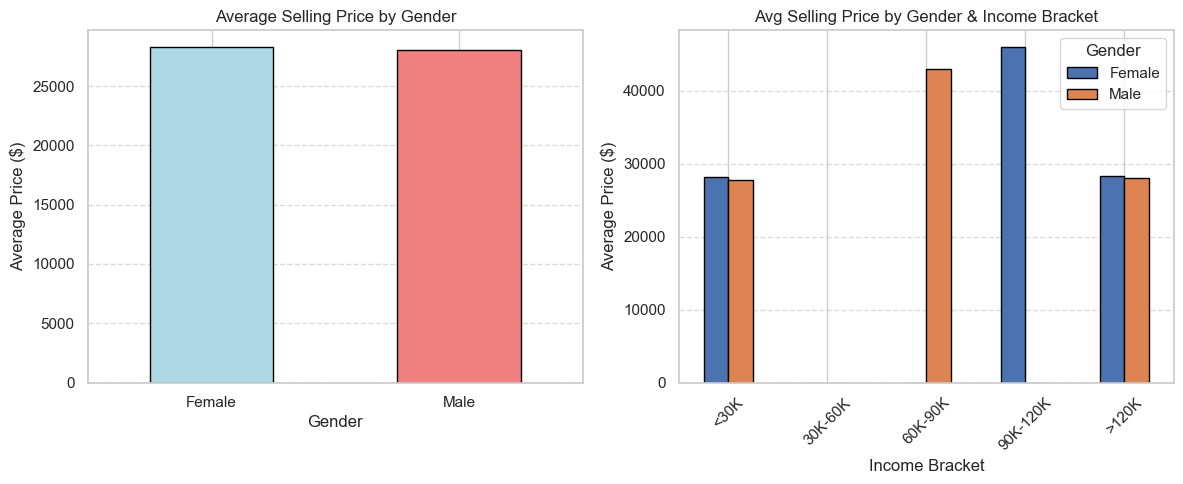

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the average selling price by gender
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()

# Step 2: Define income brackets
bins = [0, 30000, 60000, 90000, 120000, float('inf')]  # Example income ranges
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '>120K']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

# Step 3: Calculate the average selling price by gender and income bracket
avg_price_by_gender_income = df.groupby(['Income Bracket', 'Gender'])['Price ($)'].mean().unstack()

# Step 4: Create bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Average selling price by gender
avg_price_by_gender.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black', ax=axes[0])
axes[0].set_title('Average Selling Price by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Price ($)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Average selling price by gender & income bracket
avg_price_by_gender_income.plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_title('Avg Selling Price by Gender & Income Bracket')
axes[1].set_xlabel('Income Bracket')
axes[1].set_ylabel('Average Price ($)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Gender')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
#7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

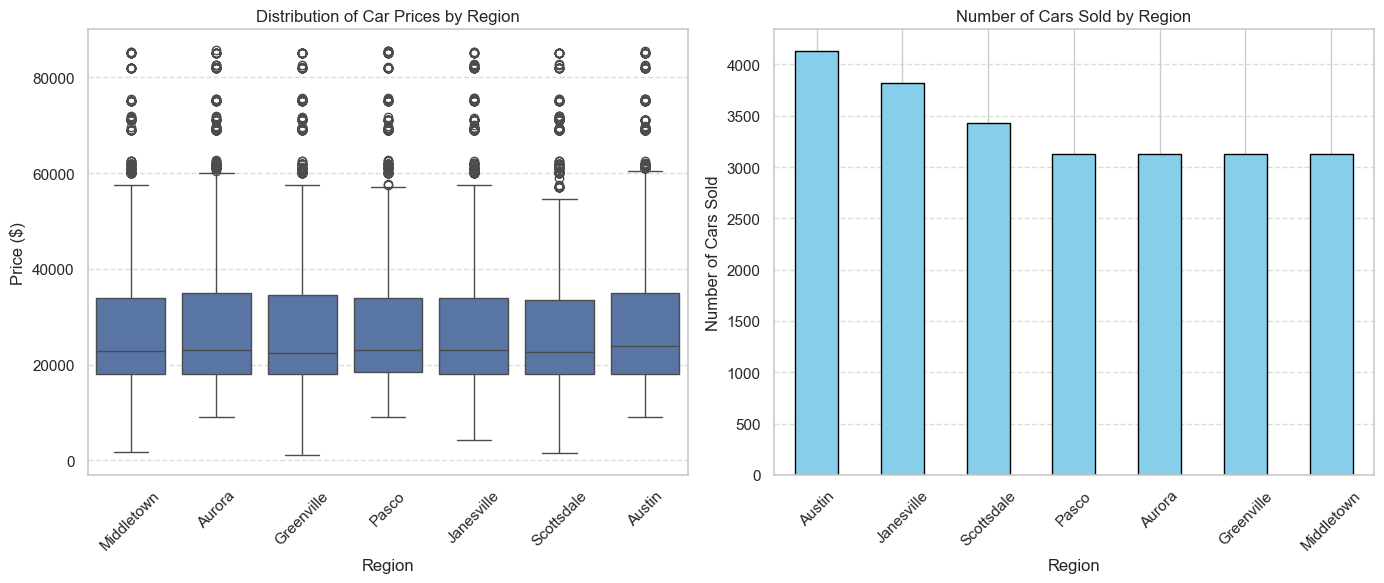

In [47]:


# Step 1: Group data by region to get price distribution and count of cars sold
region_price_distribution = df.groupby('Dealer_Region')['Price ($)']
region_car_count = df['Dealer_Region'].value_counts()

# Step 2: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Boxplot of car prices by region
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, ax=axes[0])
axes[0].set_title('Distribution of Car Prices by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Price ($)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Bar chart for the number of cars sold per region
region_car_count.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Number of Cars Sold by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Cars Sold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
#8) How does the average car price differ between cars with different engine sizes?

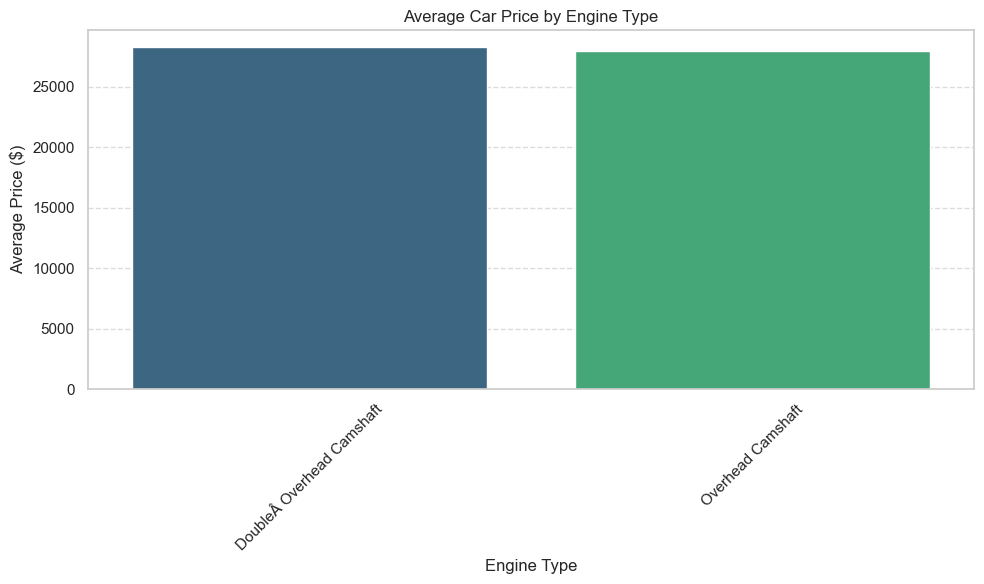

In [48]:


# Step 1: Calculate the average car price by engine type
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()

# Step 2: Create a bar plot to visualize the average price by engine type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette='viridis')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#9) How do car prices vary based on the customer’s annual income bracket?

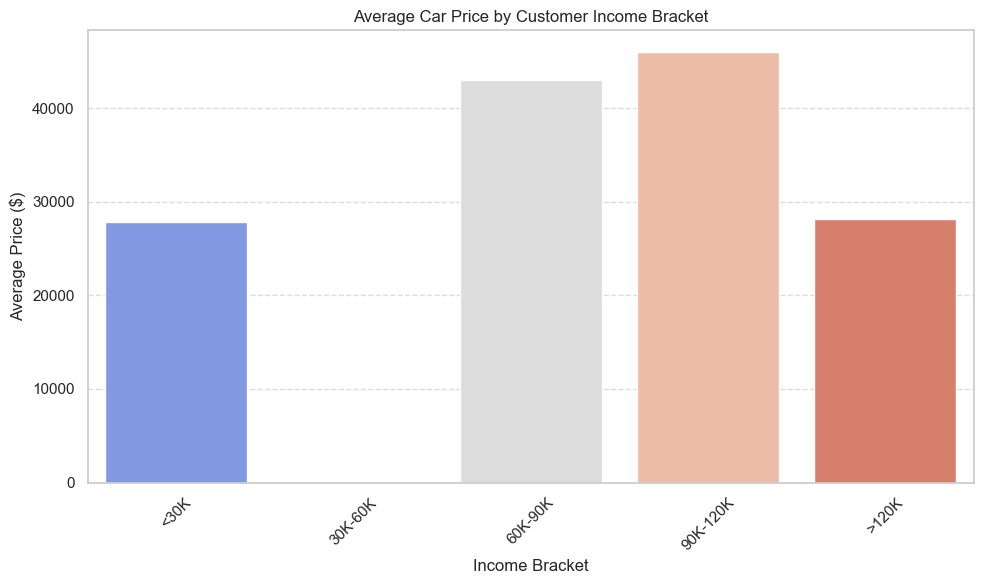

In [49]:


# Step 1: Define income brackets based on Annual Income
bins = [0, 30000, 60000, 90000, 120000, float('inf')]  # Income ranges
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '>120K']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

# Step 2: Calculate the average car price by income bracket
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()

# Step 3: Create a bar plot to visualize the average car price by income bracket
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette='coolwarm')
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#10)  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

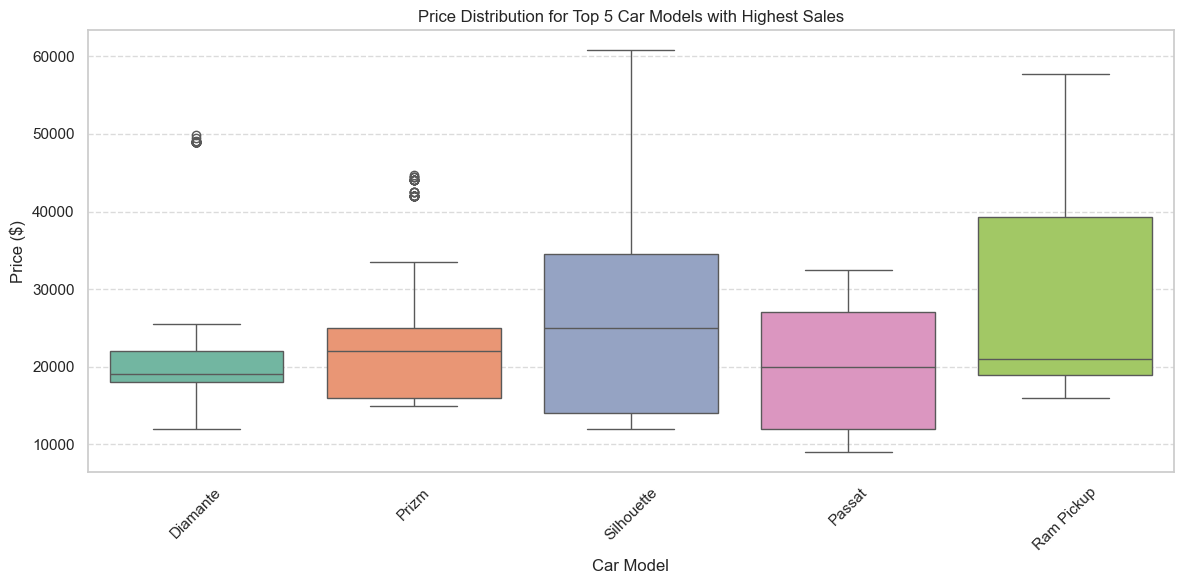

In [50]:

# Step 1: Find the top 5 car models with the highest number of sales
top_5_models = df['Model'].value_counts().head(5).index

# Step 2: Filter the dataset to include only the top 5 models
top_5_data = df[df['Model'].isin(top_5_models)]

# Step 3: Create a boxplot to show the price distribution of these top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_data, order=top_5_models, palette='Set2')
plt.title('Price Distribution for Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#11)  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

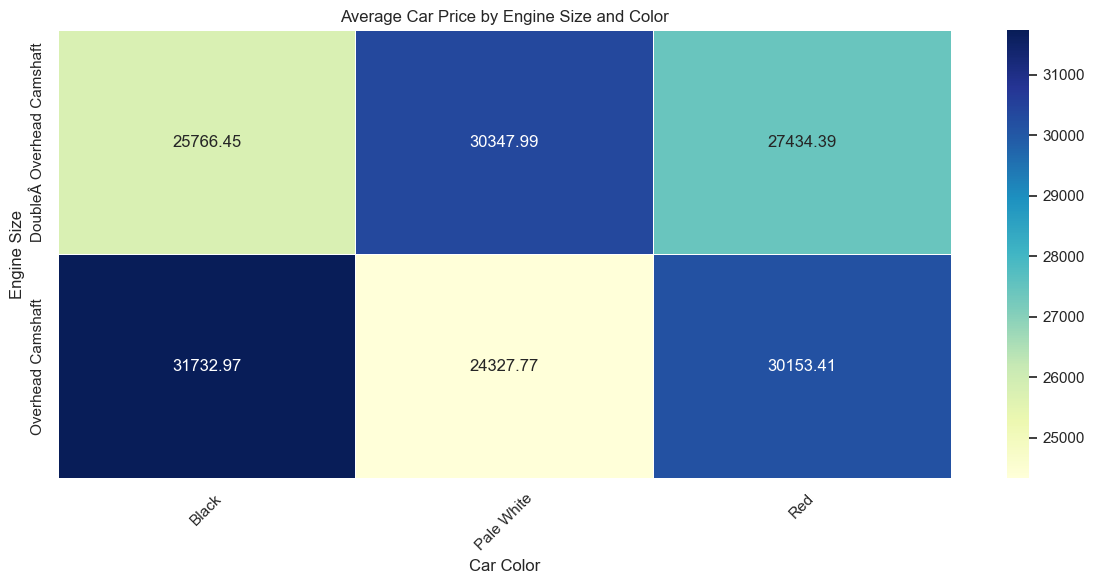

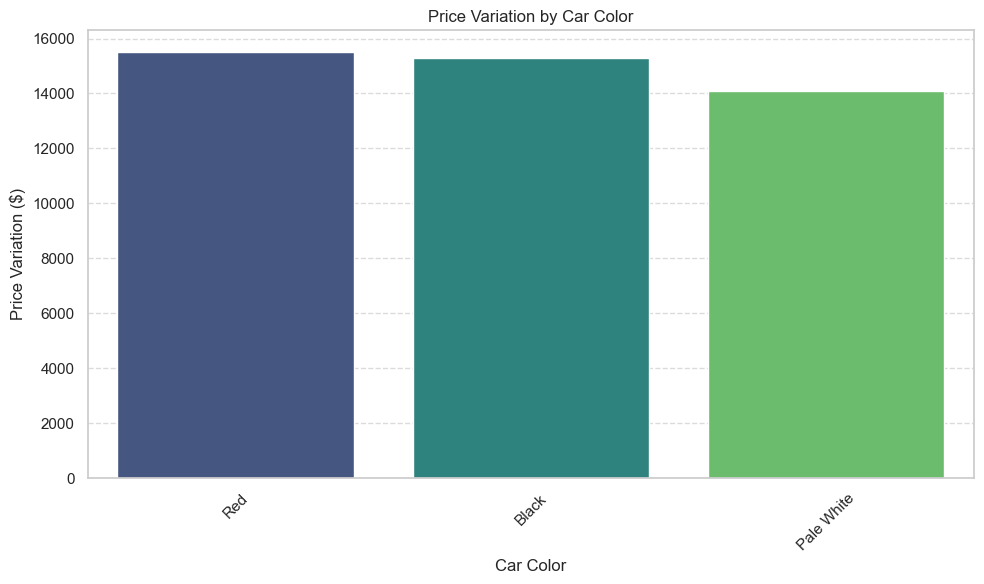

In [55]:


# Step 1: Calculate average price by engine size and car color
avg_price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

# Step 2: Calculate price variation (standard deviation) by color
price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

# Step 3: Create a heatmap to visualize the average price by engine size and color
plt.figure(figsize=(12, 6))
sns.heatmap(avg_price_by_engine_color, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Visualize the price variation by car color
plt.figure(figsize=(10, 6))
sns.barplot(x=price_variation_by_color.index, y=price_variation_by_color.values, palette='viridis')
plt.title('Price Variation by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#12)  Is there any seasonal trend in car sales based on the date of sale?

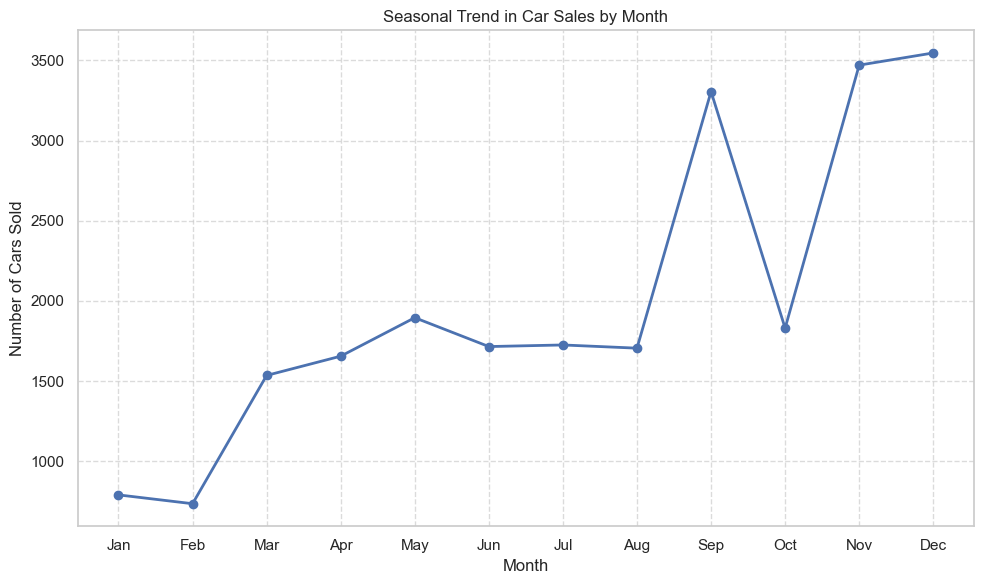

In [54]:

# Step 1: Convert the 'Date' column to datetime format if not already in that format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Extract the month from the date
df['Month'] = df['Date'].dt.month
# Alternatively, you could extract the quarter using df['Date'].dt.quarter

# Step 3: Count the number of cars sold each month
monthly_sales = df.groupby('Month')['Car_id'].count()

# Step 4: Plot the seasonal trend of car sales based on month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Seasonal Trend in Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#13)  How does the car price distribution change when considering different combinations of body style and transmission type?

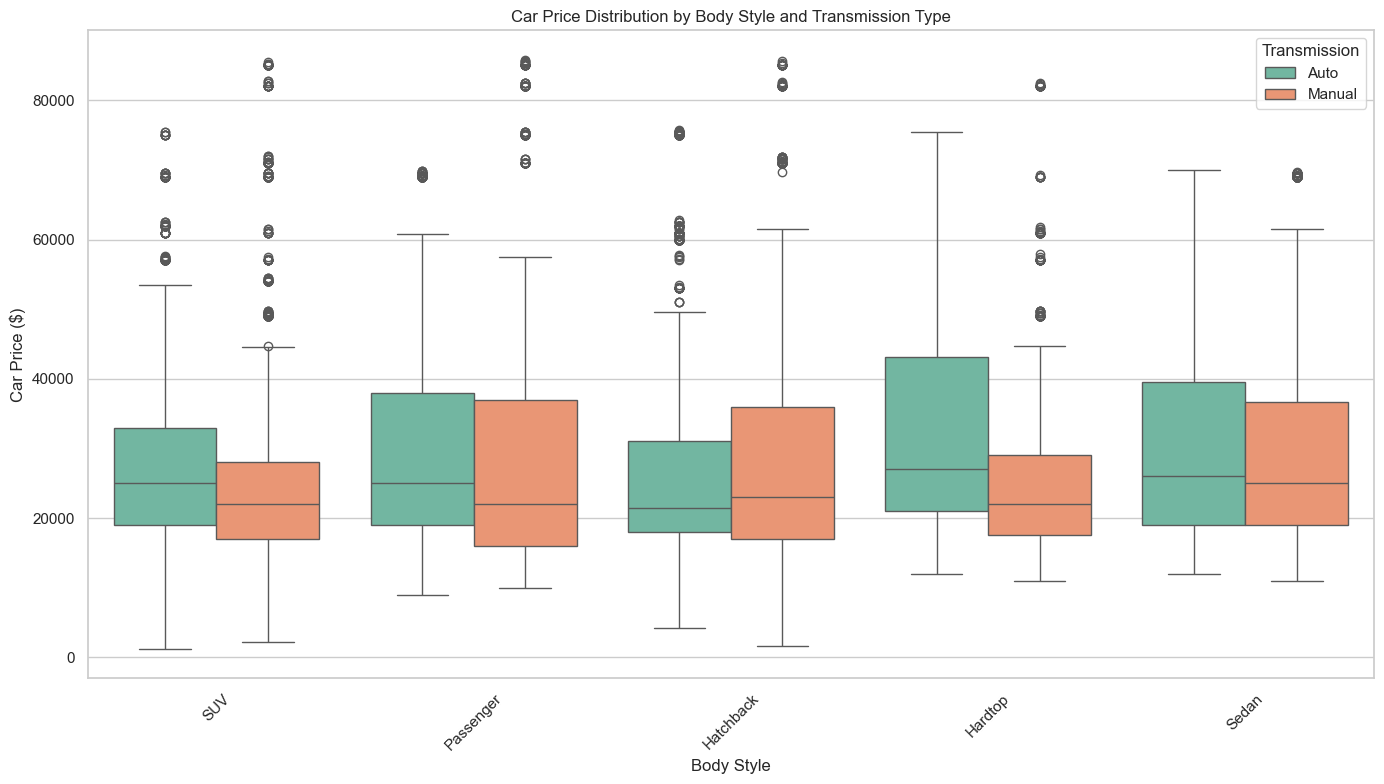

In [53]:

# Step 1: Create a box plot to visualize the car price distribution based on body style and transmission type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')

# Step 2: Enhance the plot with additional styling
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
 #14) What is the correlation between car price, engine size, and annual income of customers, and how do thesefeatures interact?

In [68]:
# Step 1: Create a mapping for engine descriptions
engine_mapping = {
    'Overhead Camshaft': 1,
    'Double Overhead Camshaft': 2
}

# Step 2: Apply the mapping to the 'Engine' column
df['Engine Encoded'] = df['Engine'].map(engine_mapping)

# Step 3: Check if the encoding worked as expected
print(df[['Engine', 'Engine Encoded']].head())


                      Engine  Engine Encoded
0  DoubleÂ Overhead Camshaft             NaN
1  DoubleÂ Overhead Camshaft             NaN
2          Overhead Camshaft             1.0
3          Overhead Camshaft             1.0
4  DoubleÂ Overhead Camshaft             NaN


In [69]:
# Step 4: Handle missing values or unknown engine types
df['Engine Encoded'].fillna(0, inplace=True)  # Replace NaN with 0, or another strategy if needed


In [70]:
# Step 5: Calculate correlation matrix for price, engine encoding, and annual income
correlation_matrix = df[['Price ($)', 'Engine Encoded', 'Annual Income']].corr()

# Display the correlation matrix
print(correlation_matrix)


                Price ($)  Engine Encoded  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine Encoded  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


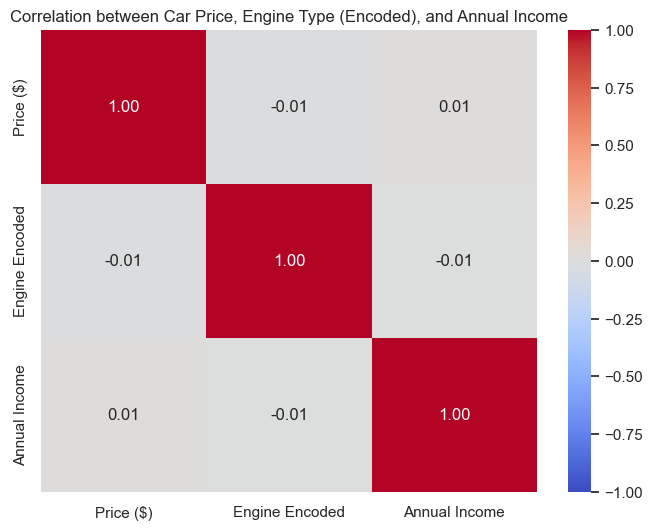

In [71]:
# Visualizing the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation between Car Price, Engine Type (Encoded), and Annual Income')
plt.show()


In [ ]:
#15) How does the average car price vary across different car models and engine types?

In [72]:
# Step 1: Group by car model and engine type
# We'll use the 'Engine Encoded' column if you have it, or the 'Engine' column directly if not encoded yet
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Step 2: Sort by price for better visualization
average_price_by_model_engine_sorted = average_price_by_model_engine.sort_values(by='Price ($)', ascending=False)

# Display the result
print(average_price_by_model_engine_sorted.head())


      Model                     Engine     Price ($)
212      SC          Overhead Camshaft  61074.818182
198  Ranger  DoubleÂ Overhead Camshaft  61064.055556
222   Sable          Overhead Camshaft  61039.770833
56   Catera  DoubleÂ Overhead Camshaft  56836.933333
143   LX470          Overhead Camshaft  54037.490196


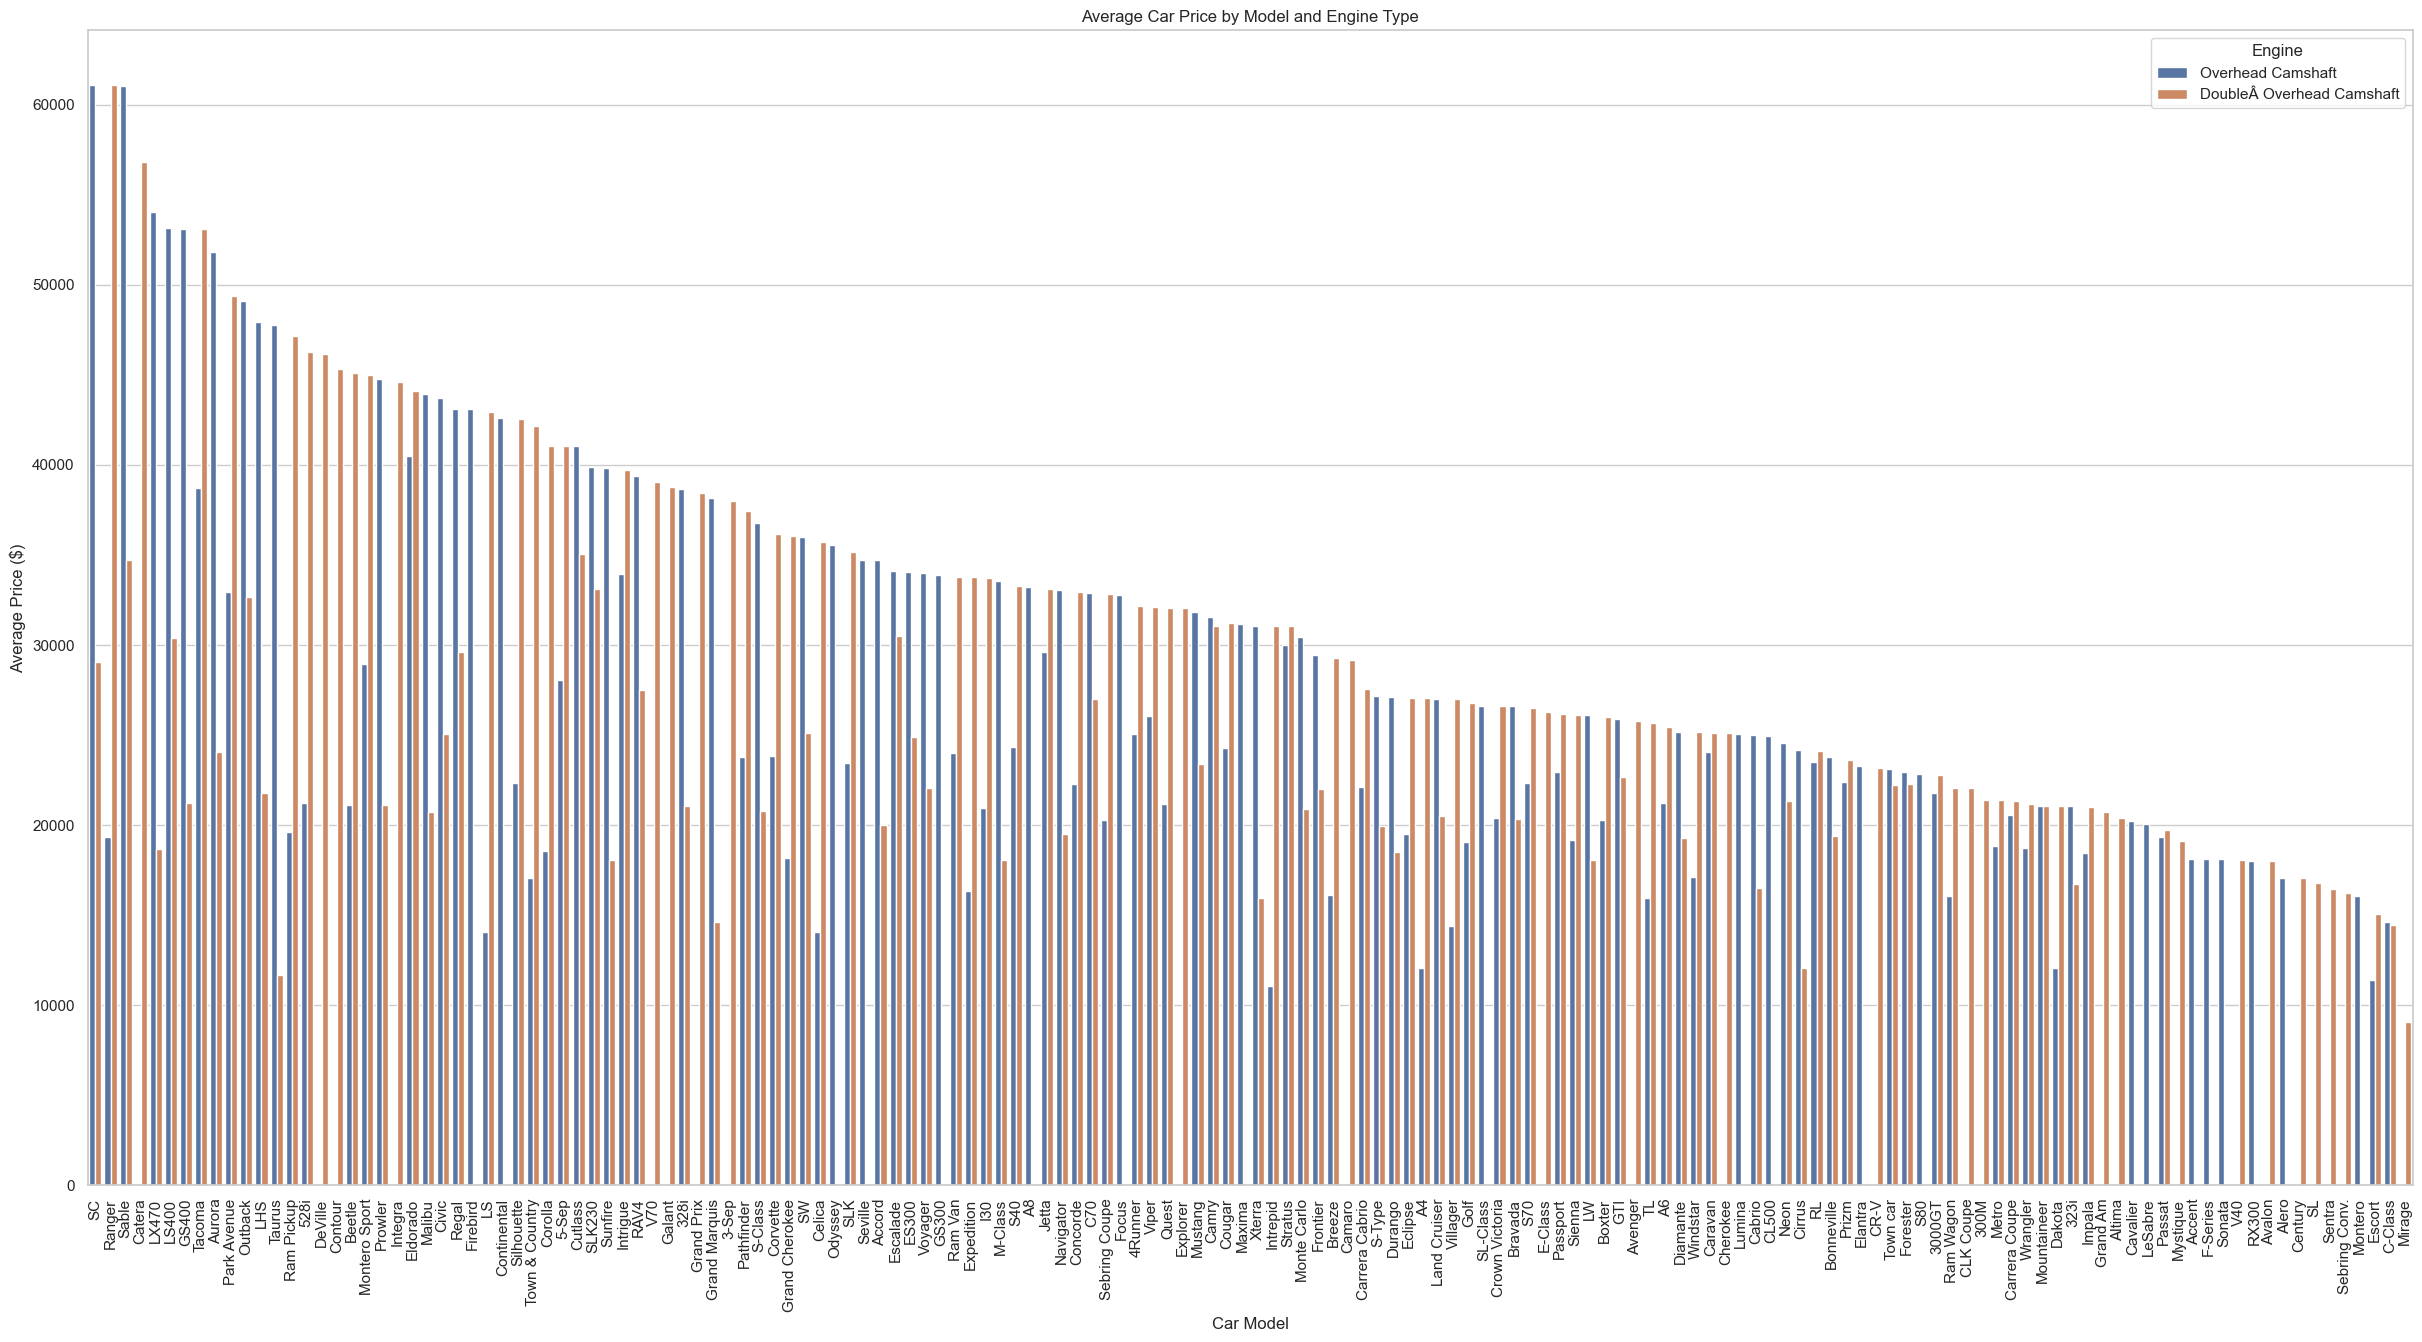

In [80]:


# Step 3: Create a bar plot for better visualization
plt.figure(figsize=(30, 15))
sns.barplot(data=average_price_by_model_engine_sorted, x='Model', y='Price ($)', hue='Engine')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding titles and labels
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')

plt.show()


In [ ]:
                                    #   EDA assighnment 3

In [131]:

df = pd.read_csv('amazon.csv.')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
#1)  What is the average rating for each product category?

In [88]:
# Convert the 'rating' column to numeric, coercing errors to NaN (if any non-numeric values exist)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing 'rating' if necessary
df_cleaned = df.dropna(subset=['rating'])

# Calculate the average rating for each product category
average_rating_by_category = df_cleaned.groupby('category')['rating'].mean()
print(average_rating_by_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [ ]:
#2) What are the top rating_count products by category?

In [90]:
# Convert 'rating_count' to numeric, coercing errors to NaN (if any non-numeric values exist)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with missing 'rating_count' if necessary
df_cleaned = df.dropna(subset=['rating_count'])

# Get the top N products by rating_count
top_rating_count_products = df_cleaned.nlargest(10, 'rating_count')

# Display the result
print(top_rating_count_products[['product_name', 'category', 'rating_count']])


                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                               category  rating_count  
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...         992.0  
750   Electronics|GeneralPurposeBatteries&BatteryCha...         989.0  
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         976.0  
32    Computers&Accessories|Accessories&Peripherals|...       

In [ ]:
#3) What is the distribution of discounted prices vs. actual prices?

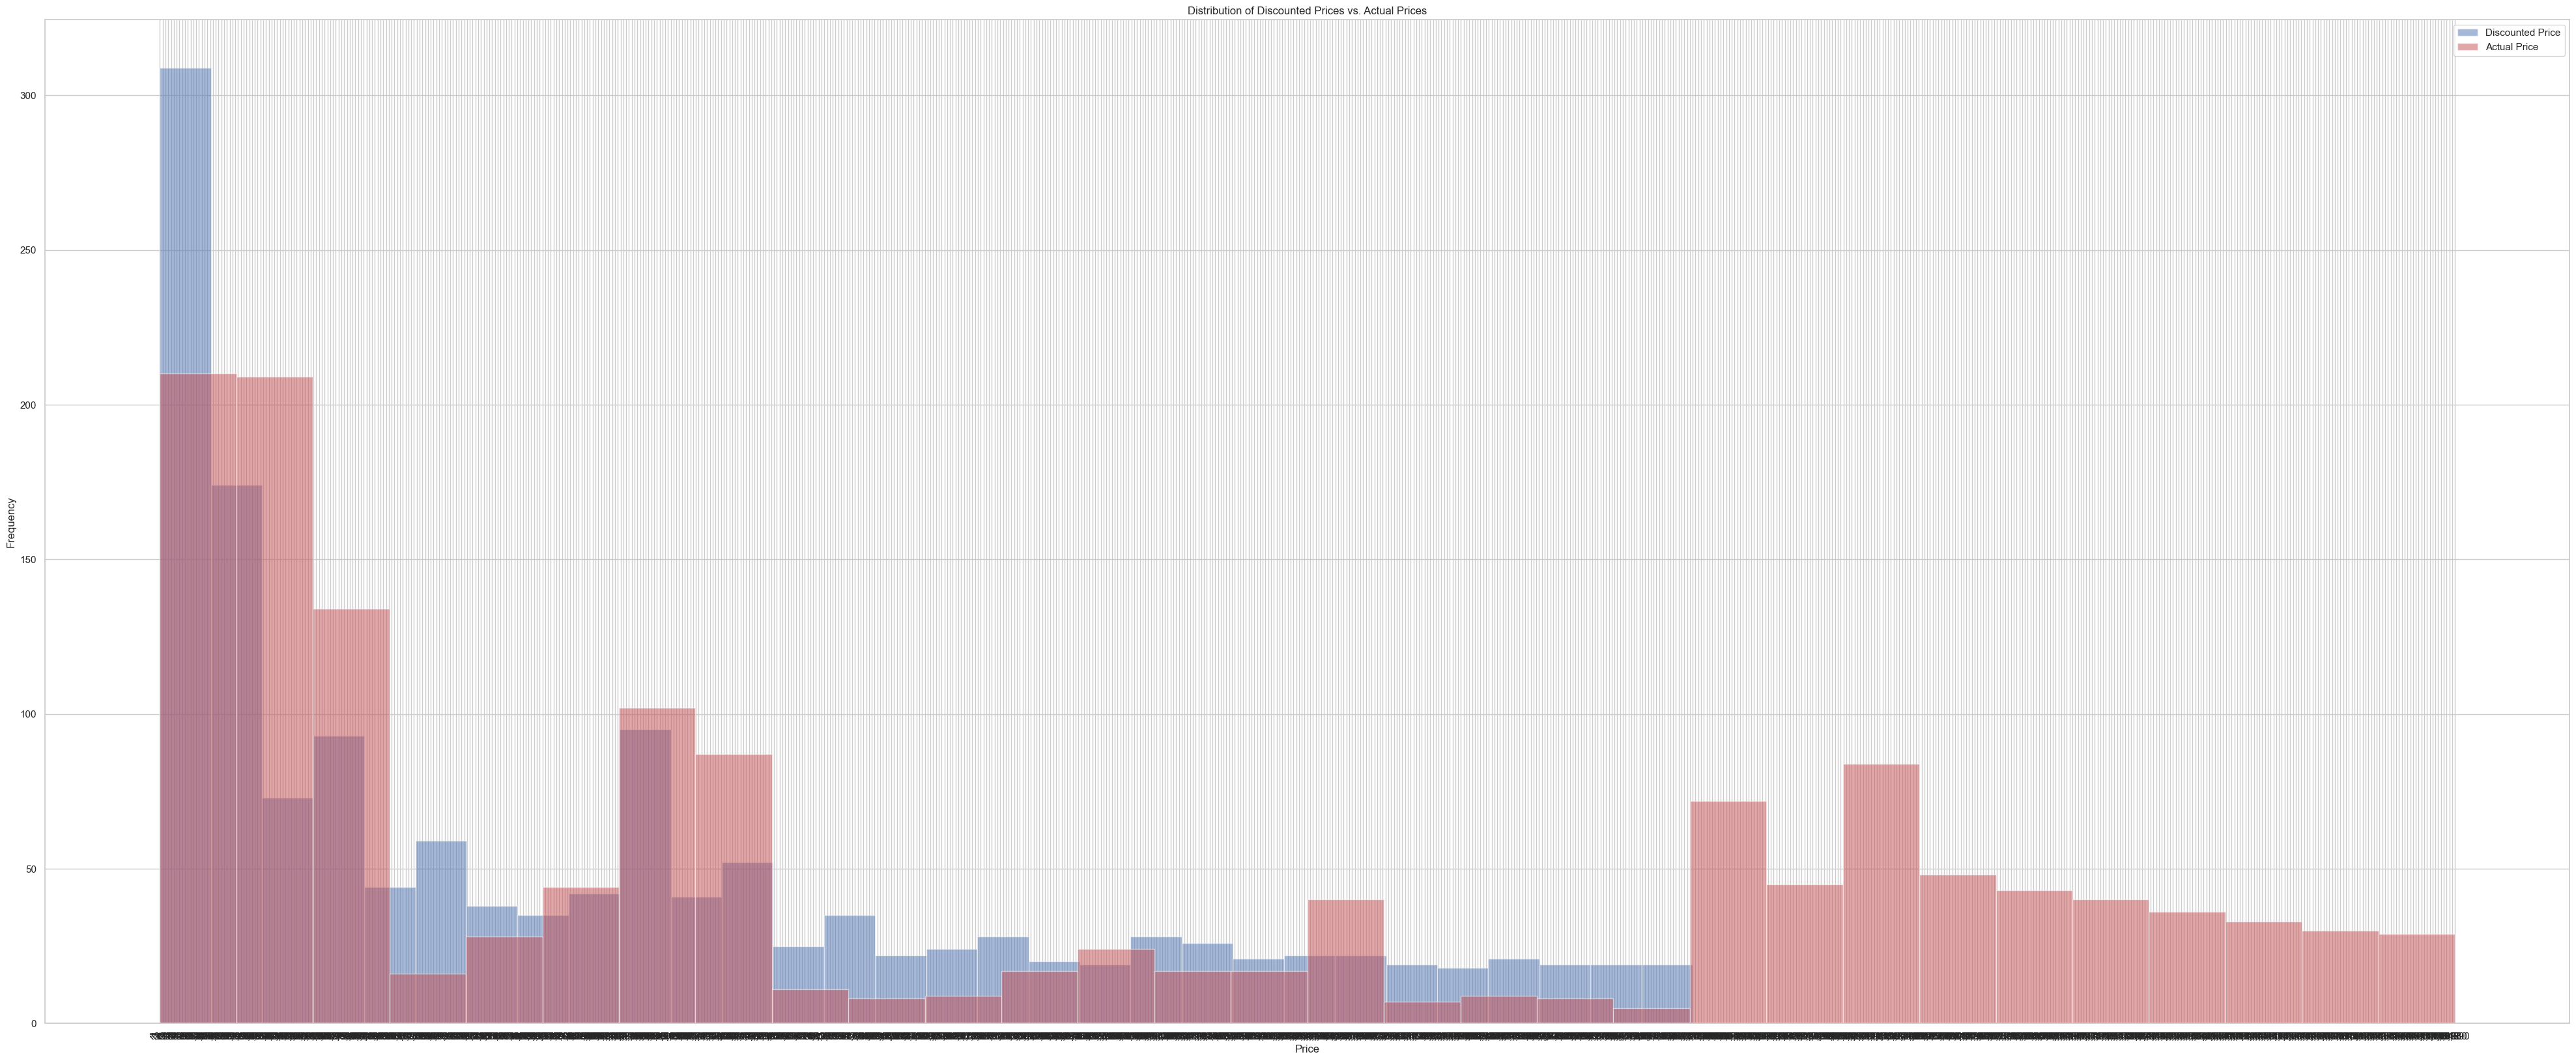

In [116]:
import matplotlib.pyplot as plt

# Distribution of discounted prices vs. actual prices
plt.figure(figsize=(50,20))
plt.hist(df['discounted_price'], bins=30, alpha=0.5, label='Discounted Price', color='b')
plt.hist(df['actual_price'], bins=30, alpha=0.5, label='Actual Price', color='r')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


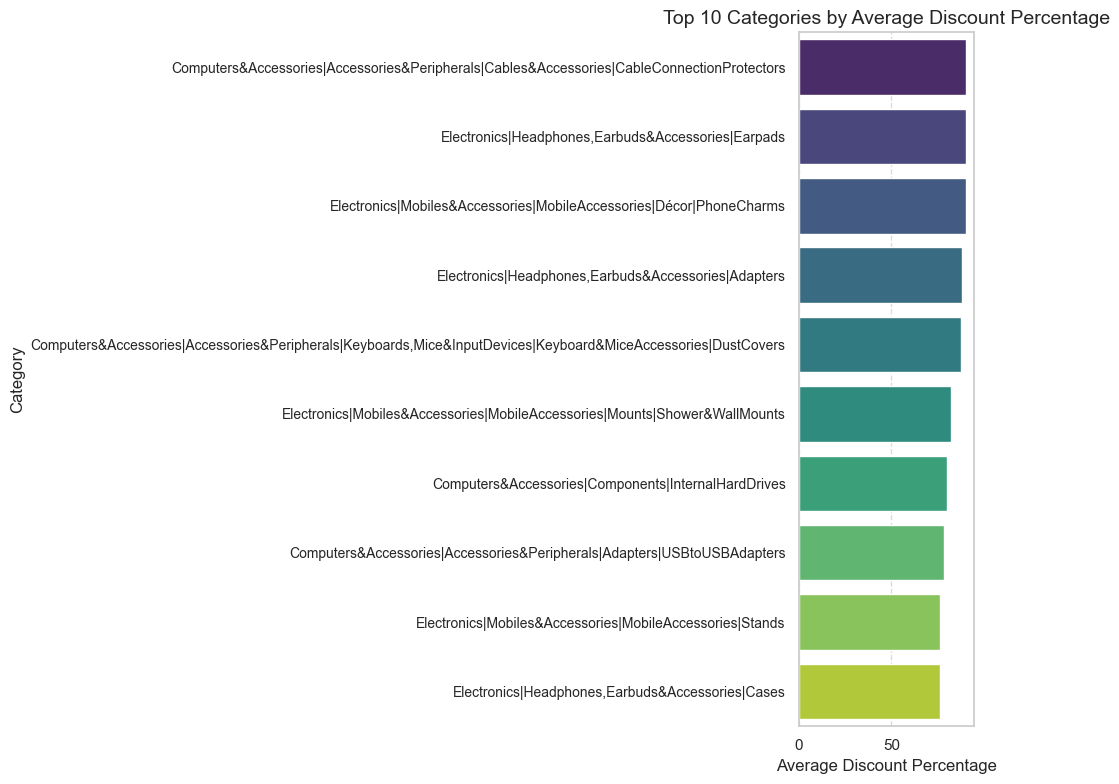

In [144]:
#4) How does the average discount percentage vary across categories?


# Group by category and calculate the mean discount percentage
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Rename the columns for clarity
average_discount_by_category.columns = ['Category', 'Average Discount Percentage']

# Sort the results for better visualization
average_discount_by_category = average_discount_by_category.sort_values(by='Average Discount Percentage', ascending=False)

# Filter top 10 categories (optional)
top_categories = average_discount_by_category.nlargest(10, 'Average Discount Percentage')

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot
sns.barplot(x='Average Discount Percentage', y='Category', data=top_categories, palette='viridis', orient='h')

# Add labels and title
plt.xlabel('Average Discount Percentage', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 10 Categories by Average Discount Percentage', fontsize=14)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#5) What are the most popular product names?

In [104]:
# Most popular product names based on rating count
most_popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print(most_popular_products)


                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


In [ ]:
#6) What are the most popular product keywords?

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting keywords from the product names (you could also use 'about_product' for more detailed keywords)
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Extract top 10 keywords
X = vectorizer.fit_transform(df['product_name'])
keywords = vectorizer.get_feature_names_out()

print("Most Popular Keywords in Product Names:", keywords)


Most Popular Keywords in Product Names: ['black' 'cable' 'charging' 'compatible' 'fast' 'smart' 'tv' 'type' 'usb'
 'white']


In [ ]:
#7) What are the most popular product reviews?

                                           review_title rating_count
1279  Decent product,doesn't pick up sand,Ok ok,Must...          992
750   Nice .,very good batteries received,Longtevity...          989
977   A Quality Sound-Signature but leaves craving f...       98,250
1059  Kettle is good but bottle is not good quality,...          976
151   Great Cable, Charging Speeds Could Be Better,G...          974
32    Great Cable, Charging Speeds Could Be Better,G...          974
823   Great Cable, Charging Speeds Could Be Better,G...          974
536   Worth Every Square Inch.,VFM, Plastic build. M...       97,175
918   Worth Every Square Inch.,VFM, Plastic build. M...       97,174
1165  Good clips.,Second quality,Value for money.,No...           97


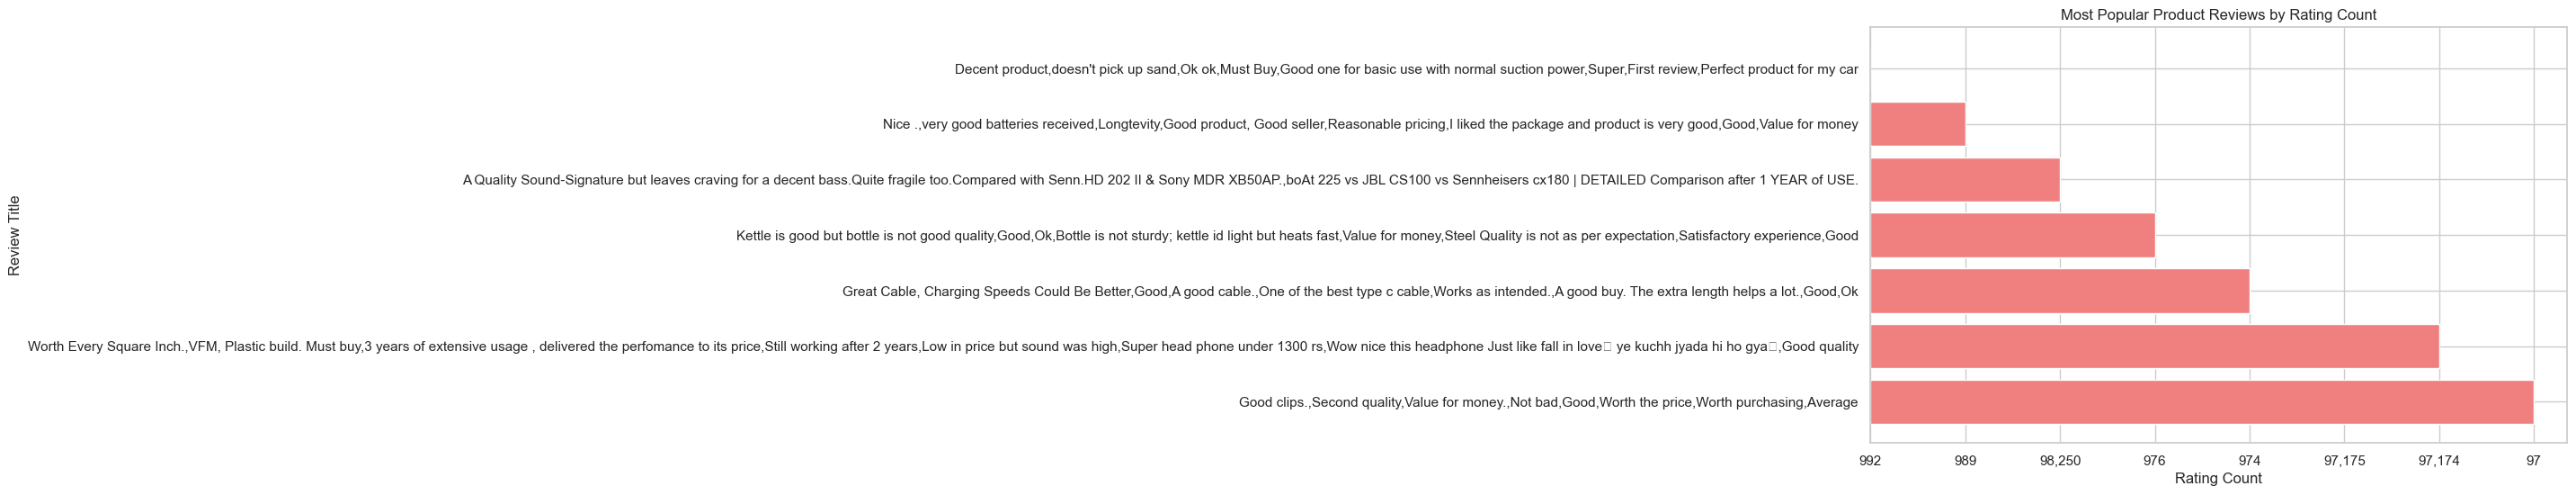

In [145]:
# Step 1: Filter the reviews with the highest rating counts
# Sorting by 'rating_count' column in descending order to get the most popular reviews
top_reviews_df = df[['review_title', 'review_content', 'rating_count']].sort_values(by='rating_count', ascending=False)

# Step 2: Extract top 10 reviews
top_reviews = top_reviews_df.head(10)

# Display the top 10 reviews
print(top_reviews[['review_title', 'rating_count']])

# Step 3: Visualizing the most popular review titles
plt.figure(figsize=(10, 6))
plt.barh(top_reviews['review_title'], top_reviews['rating_count'], color='lightcoral')
plt.xlabel('Rating Count')
plt.ylabel('Review Title')
plt.title('Most Popular Product Reviews by Rating Count')
plt.gca().invert_yaxis()  # To show the review with the most votes on top
plt.show()

In [ ]:
#8) What is the correlation between discounted_price and rating?

Correlation between discounted_price and rating: 0.12


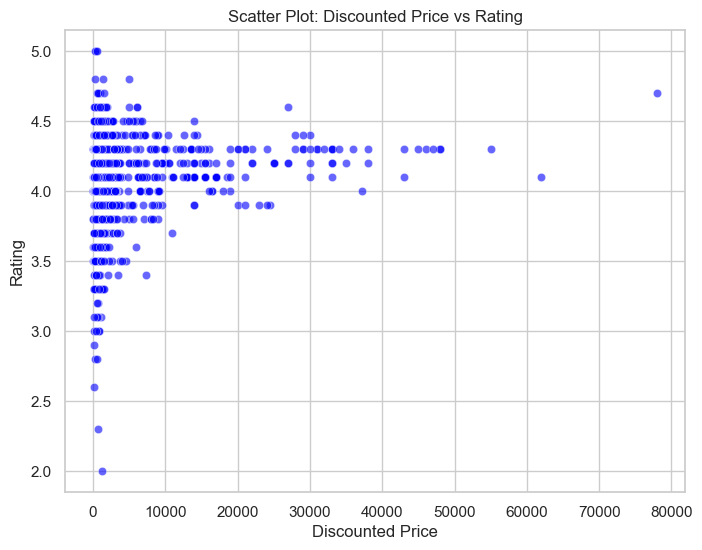

In [149]:


# Clean the discounted_price column (remove currency symbols and commas)
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Ensure the rating column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values in discounted_price or rating
df.dropna(subset=['discounted_price', 'rating'], inplace=True)

# Calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df, alpha=0.6, color='blue')
plt.title('Scatter Plot: Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
#9) What are the Top 5 categories based on the highest ratings?

In [112]:
# Step 1: Convert 'rating' column to numeric, coercing errors to NaN (for non-numeric values)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 2: Group by 'category' and calculate the average rating for each category
average_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Step 3: Get the top 5 categories based on highest average rating
top_5_categories_by_rating = average_rating_by_category.head(5)

# Step 4: Display the results
print("Top 5 Categories Based on Highest Average Ratings:")
print(top_5_categories_by_rating)


Top 5 Categories Based on Highest Average Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
#10) Identify any potential areas for improvement or optimization based on the data analysis.


In [ ]:
'''
1. Pricing Strategy Optimization
Observation: The correlation between discounted_price and rating is weak, indicating that discounts may not significantly impact customer satisfaction.

Recommendation:

Experiment with dynamic pricing strategies to maximize revenue without compromising customer satisfaction.

Analyze the impact of discounts on sales volume and profitability. Focus on products where discounts drive higher sales without significantly reducing margins.

2. Product Category Performance
Observation: Some product categories may have higher ratings or sales than others.

Recommendation:

Identify top-performing categories and allocate more resources (e.g., marketing, inventory) to them.

Investigate underperforming categories to understand the reasons (e.g., poor product quality, lack of customer interest) and take corrective actions.

3. Customer Feedback Analysis
Observation: Reviews with higher ratings and longer content are often more helpful and engaging.

Recommendation:

Encourage customers to leave detailed reviews by offering incentives (e.g., discounts, loyalty points).

Use sentiment analysis on reviews to identify common pain points or areas for improvement in products or services.

4. Product Quality Improvement
Observation: Products with lower ratings may have recurring issues mentioned in reviews.

Recommendation:

Analyze low-rated products to identify common complaints (e.g., durability, functionality).

Work with suppliers or manufacturers to improve product quality based on customer feedback.

5. Marketing and Promotion
Observation: Products with higher discounts may attract more attention, but this does not always translate to higher ratings.

Recommendation:

Focus on value-based marketing rather than just discount-driven campaigns.

Highlight unique selling points (e.g., features, quality) in product descriptions and advertisements.

6. Inventory Management
Observation: Some products may have high demand but low stock availability.

Recommendation:

Use sales data to optimize inventory levels and avoid stockouts for popular products.

Implement demand forecasting models to predict future sales and plan inventory accordingly.

7. User Experience Enhancement
Observation: Reviews may highlight issues with the purchasing or delivery process.

Recommendation:

Improve the user experience on the website or app (e.g., faster checkout, better search functionality).

Address delivery-related complaints by partnering with reliable logistics providers.

8. Personalization and Recommendations
Observation: Customers may prefer personalized product recommendations.

Recommendation:

Implement recommendation systems based on customer browsing and purchase history.

Use machine learning algorithms to suggest products that align with individual preferences.

9. Competitor Analysis
Observation: Competitors may offer similar products at lower prices or with better features.

Recommendation:

Conduct competitive benchmarking to identify areas where your products can outperform competitors.

Adjust pricing, features, or marketing strategies based on competitor analysis.

10. Data-Driven Decision Making
Observation: The dataset contains valuable insights that can drive business decisions.

Recommendation:

Invest in data analytics tools to continuously monitor and analyze sales, customer feedback, and market trends.

Train teams to use data effectively for decision-making and strategy formulation.
'''

In [ ]:
                                          #    [EDA -4 assighnment]

In [150]:
spotify=pd.read_csv('spotify.csv')

In [151]:
spotify.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [152]:
spotify['Popularity'].dtype

dtype('int64')

In [153]:
spotify['Duration (ms)'].dtype

dtype('int64')

In [ ]:
#1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

In [155]:

print("Basic Information about the Dataset:")
print(df.info())

# Step 1: Check for null values
null_values = df.isnull().sum()
print("\nNull Values in Each Column:")
print(null_values)

# Step 2: Handle missing values (if any)
# For simplicity, let's drop rows with any missing values, but you can fill them based on your requirement
df_cleaned = df.dropna()  # Drop rows with missing values

# If you want to fill missing values with a placeholder, you can do:
# df_cleaned = df.fillna({"column_name": "placeholder_value"})  # Replace missing values in specific columns

# Step 3: Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Step 4: Handle duplicates (if any)
if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()  # Drop duplicate rows
    print("\nDuplicate rows have been removed.")

# Step 5: Display the cleaned data
print("\nCleaned Data:")
print(df_cleaned.head())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   object 
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   object 
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  produc

In [ ]:
# 2)  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

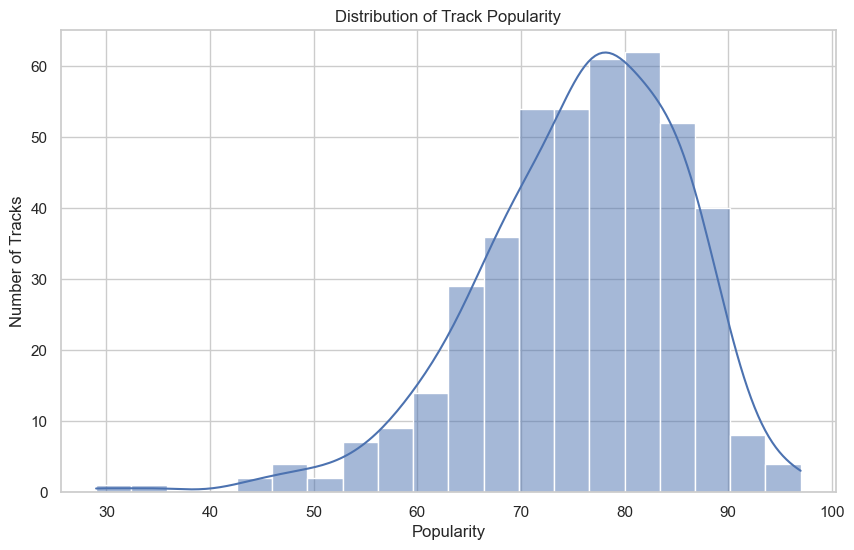

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify['Popularity'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

In [ ]:
#3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

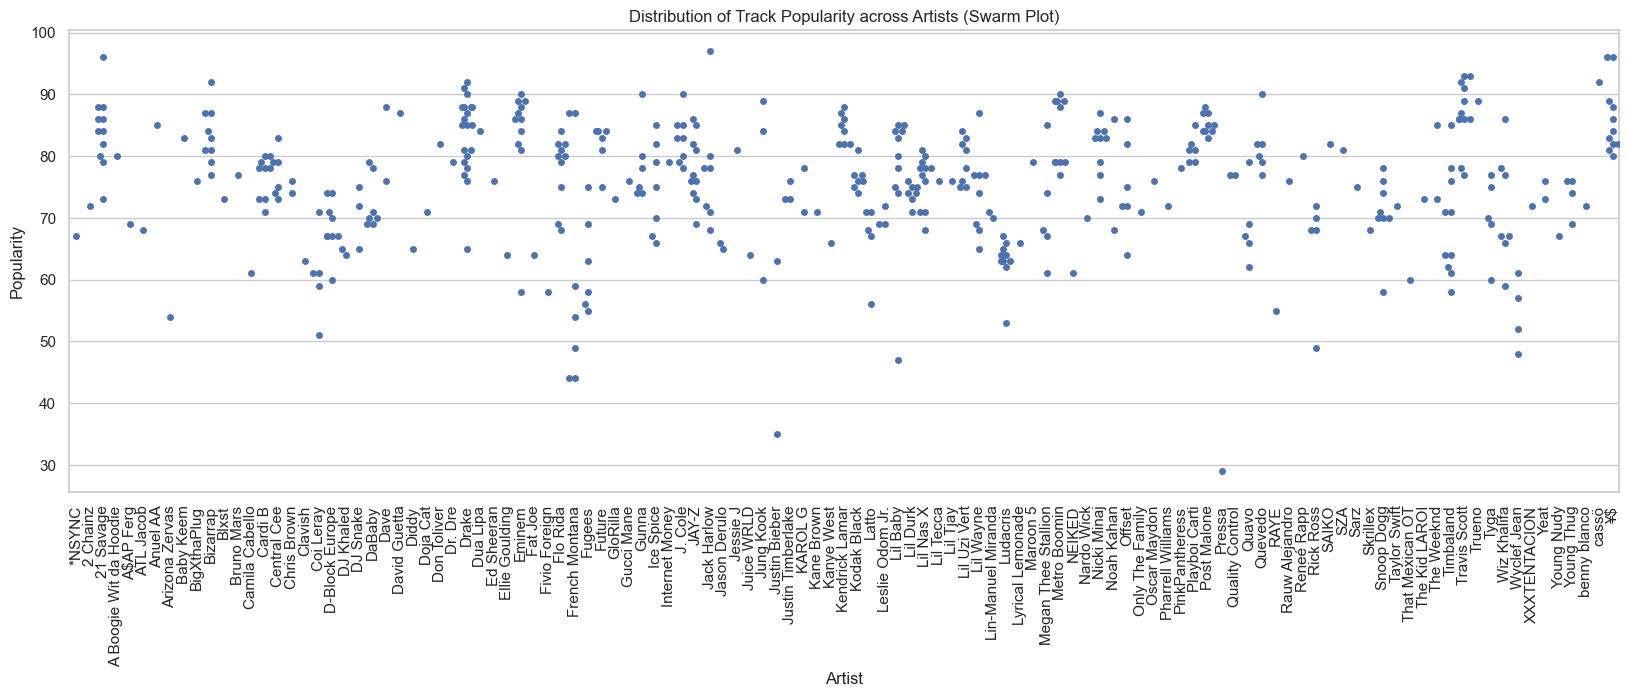

In [167]:


# Assuming the 'spotify' DataFrame is already loaded and contains the necessary columns
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Artist', y='Popularity', data=spotify.sort_values('Artist'))
plt.xticks(rotation=90)  # Rotate the x-axis labels by 45 degrees
plt.title('Distribution of Track Popularity across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()


In [ ]:
#4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

Artist with the highest number of tracks: Drake (20 tracks)


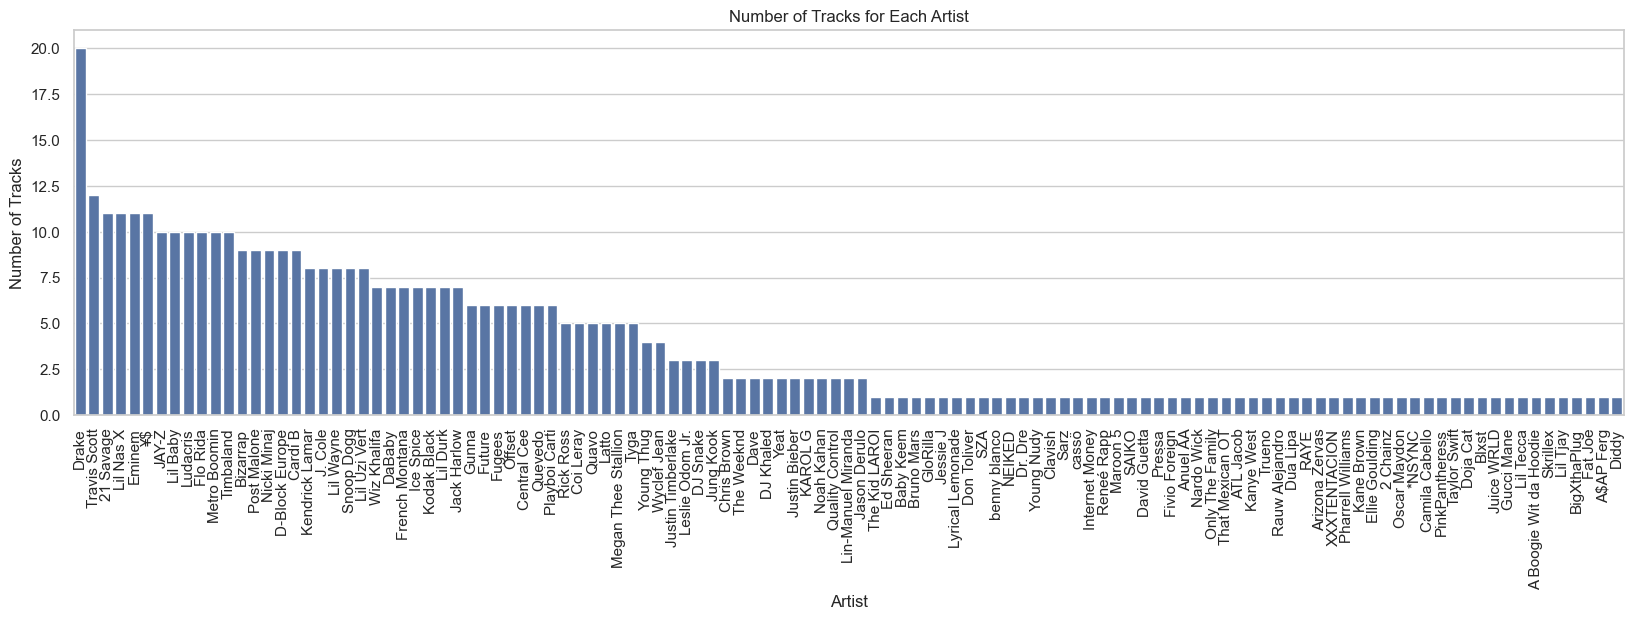

In [182]:


# Count the number of tracks for each artist
artist_track_count = spotify['Artist'].value_counts()

# Display the artist with the highest number of tracks
most_tracks_artist = artist_track_count.idxmax()
most_tracks_count = artist_track_count.max()

# Print the artist with the highest number of tracks
print(f"Artist with the highest number of tracks: {most_tracks_artist} ({most_tracks_count} tracks)")

# Plot the count of tracks for each artist
plt.figure(figsize=(20, 5))
sns.countplot(x='Artist', data=spotify, order=artist_track_count.index)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Number of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()


In [ ]:
#5)  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [173]:
# Sort the dataset by popularity in ascending order and select the top 5 least popular tracks
least_popular_tracks = spotify.sort_values('Popularity').head(5)

# Display the artist name, track name, and popularity of the least popular tracks
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks_info)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [ ]:
#6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?

In [174]:
# Group the data by 'Artist' and calculate the average popularity for each artist
average_popularity_by_artist = spotify.groupby('Artist')['Popularity'].mean()

# Sort the average popularity in descending order to get the top 5 most popular artists
top_5_most_popular_artists = average_popularity_by_artist.sort_values(ascending=False).head(5)

# Display the result
print("Top 5 Artists with the Highest Average Popularity:")
print(top_5_most_popular_artists)


Top 5 Artists with the Highest Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [ ]:
#7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [175]:
# Step 1: Get the top 5 most popular artists (already calculated)
top_5_most_popular_artists = average_popularity_by_artist.sort_values(ascending=False).head(5)

# Step 2: Filter the dataset for these top 5 artists
top_5_artists_data = spotify[spotify['Artist'].isin(top_5_most_popular_artists.index)]

# Step 3: For each artist, find the most popular track
most_popular_tracks = top_5_artists_data.loc[top_5_artists_data.groupby('Artist')['Popularity'].idxmax()]

# Step 4: Display the most popular track for each of the top 5 artists
most_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


In [ ]:
#8) Visualize relationships between multiple numerical variables simultaneously using a pair plot

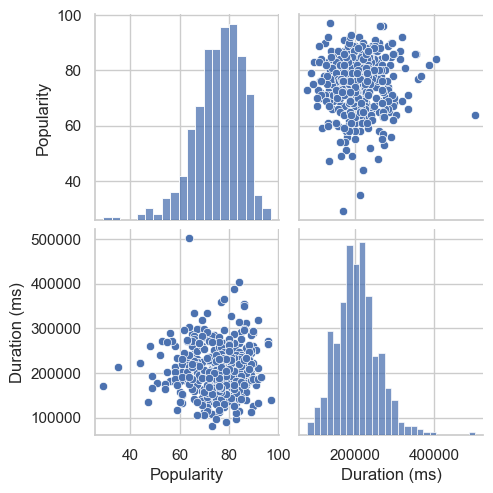

In [181]:

# Selecting the numerical columns for pairplot
numerical_columns = ['Popularity', 'Duration (ms)']  # Add other numerical columns if needed

# Create the pair plot
sns.pairplot(spotify[numerical_columns])

# Display the plot
plt.show()


In [ ]:
#9) Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

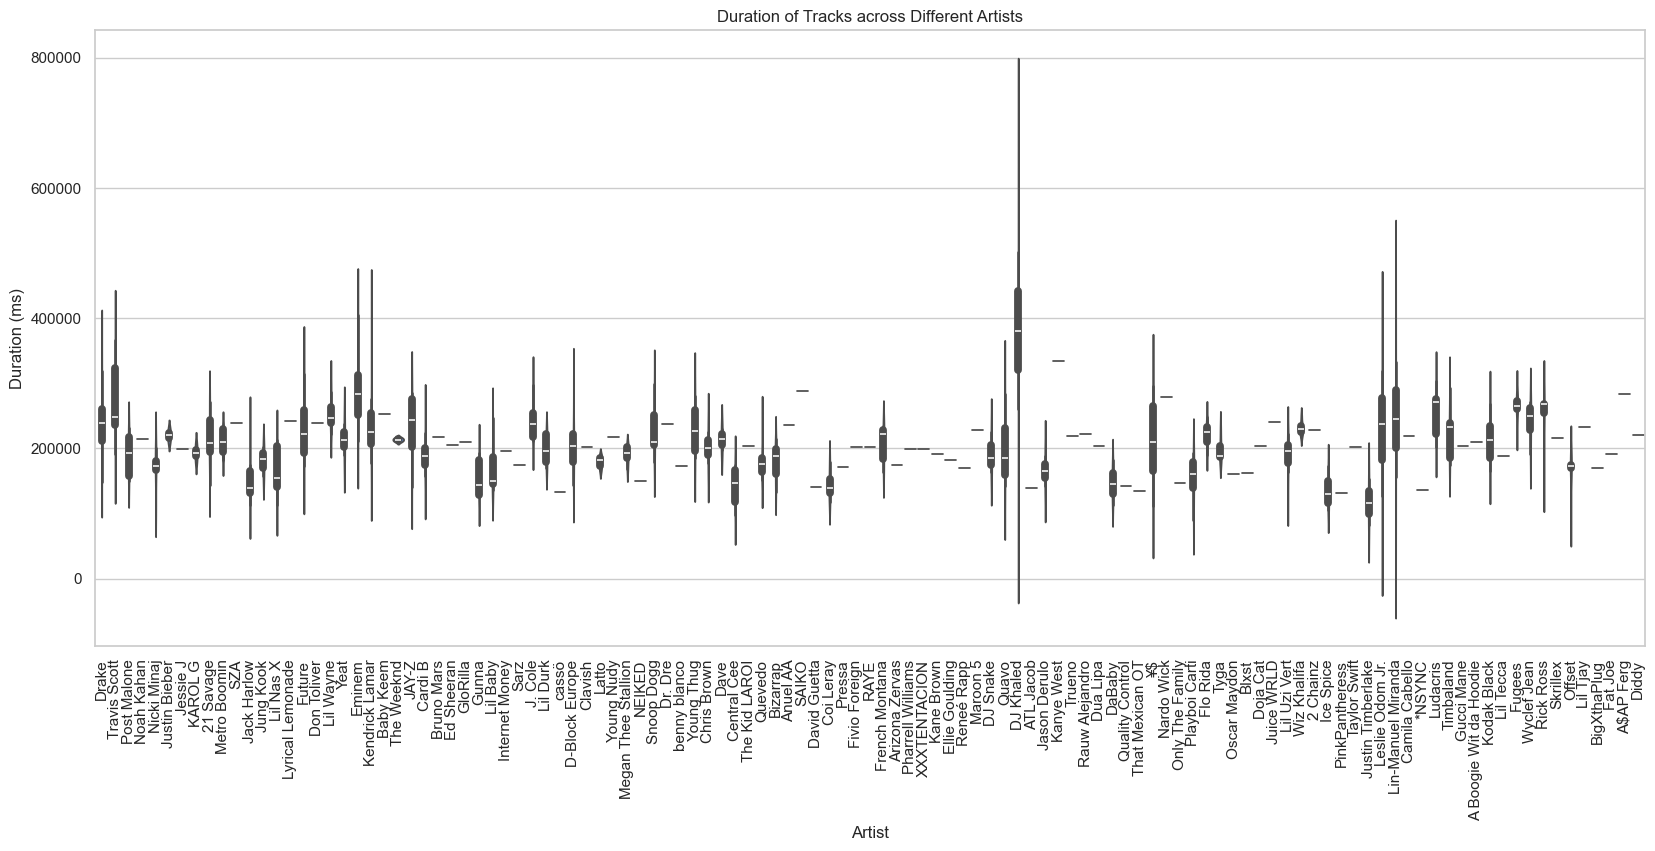

In [180]:


# Create the violin plot to explore duration across artists
plt.figure(figsize=(20, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=spotify)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Duration of Tracks across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')

# Show the plot
plt.show()


In [ ]:
#10) How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

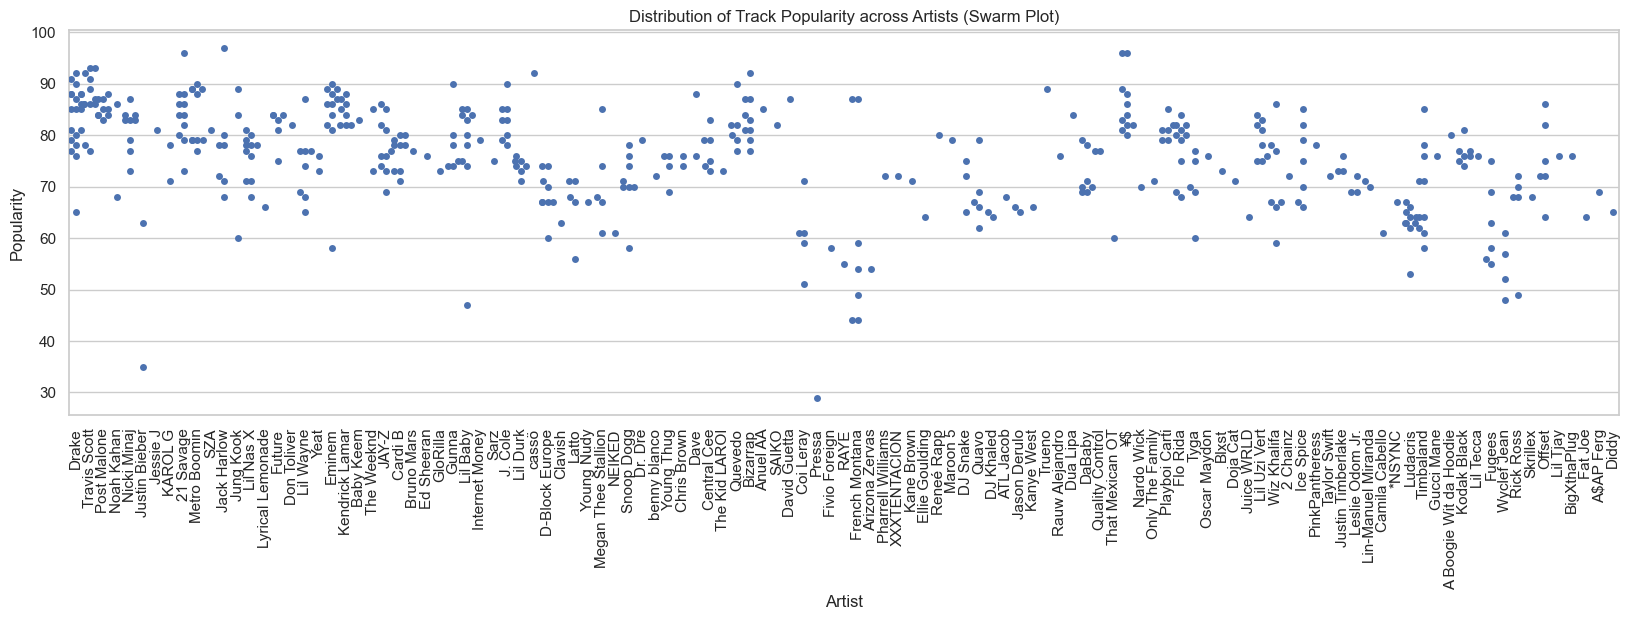

In [183]:


# Create the swarm plot to explore popularity across artists
plt.figure(figsize=(20, 5))
sns.swarmplot(x='Artist', y='Popularity', data=spotify)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Distribution of Track Popularity across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')

# Show the plot
plt.show()
